In [1]:
#Import bibliotek
import sqlite3
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
#Połączenie się z bazą danych przechowującą dane na temat filmów
db = sqlite3.connect('imdb.db')
df= pd.read_sql_query("SELECT * FROM movies", db)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD
0,1,2000,Gladiator,155,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen...",8.5,67,1206948,187705427
1,2,2000,Memento,113,"Mystery, Thriller",Christopher Nolan,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",8.5,80,1027296,25544867
2,3,2000,Przekret,104,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Benicio Del Toro, De...",8.3,55,715946,30328156
3,4,2000,Requiem dla snu,102,Drama,Darren Aronofsky,"Ellen Burstyn, Jared Leto, Jennifer Connelly, ...",8.3,68,697450,3635482
4,5,2000,X-Men,104,"Action, Adventure, Sci-Fi",Bryan Singer,"Patrick Stewart, Hugh Jackman, Ian McKellen, F...",7.4,64,533812,157299717
5,6,2000,Cast Away: Poza światem,143,"Adventure, Drama, Romance",Robert Zemeckis,"Tom Hanks, Helen Hunt, Paul Sanchez, Lari White",7.8,73,471466,233632142
6,7,2000,American Psycho,101,"Crime, Drama",Mary Harron,"Christian Bale, Justin Theroux, Josh Lucas, Bi...",7.6,64,429539,15070285
7,8,2000,Niezniszczalny,106,"Drama, Mystery, Sci-Fi",M. Night Shyamalan,"Bruce Willis, Samuel L. Jackson, Robin Wright,...",7.3,62,349558,95011339
8,9,2000,Poznaj mojego tatę,108,"Comedy, Romance",Jay Roach,"Ben Stiller, Robert De Niro, Teri Polo, Blythe...",7.0,73,292621,166244045
9,10,2000,Mission: Impossible II,123,"Action, Adventure, Thriller",John Woo,"Tom Cruise, Dougray Scott, Thandie Newton, Vin...",6.1,59,290079,215409889


In [3]:
#Sprawdzenie typów danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
list_no         6650 non-null object
release_year    6650 non-null object
name            6650 non-null object
lenght_min      6650 non-null object
genre           6650 non-null object
directors       6650 non-null object
actors          6650 non-null object
pub_rating      6650 non-null object
crt_rating      6650 non-null object
votes_no        6650 non-null object
earned_USD      6650 non-null object
dtypes: object(11)
memory usage: 571.6+ KB


In [4]:
#Typy dane należy odpowiednio przekształcić. Brak wartości zaimportowany został do bazy danych jako 'none'. 
#Teraz nalezy te wartości przekształcić w wartości nullowe.
#Sprawdzamy, które kolumny zaweirają wartość 'none':
df.columns[df.isin(['none']).any()]

Index(['lenght_min', 'directors', 'crt_rating', 'earned_USD'], dtype='object')

In [3]:
#W tych kolumnach należy zamienić wartości 'none' na nullowe. 
#df['directors'].replace('none', np.nan, inplace = True)#Ta kolumna będzie zamieniona póżniej,  gdyż będziemy chcieli
#policzyć maksymalną liczbę reżyserów
df['lenght_min'].replace('none', np.nan, inplace = True)
df['crt_rating'].replace('none', np.nan, inplace = True)
df['earned_USD'].replace('none', np.nan, inplace = True)

In [6]:
df.head(3)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD
0,1,2000,Gladiator,155,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen...",8.5,67,1206948,187705427
1,2,2000,Memento,113,"Mystery, Thriller",Christopher Nolan,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",8.5,80,1027296,25544867
2,3,2000,Przekret,104,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Benicio Del Toro, De...",8.3,55,715946,30328156


In [4]:
#Teraz możemy przekształić typy danych odpwoiednio.
df['list_no']=df.list_no.astype(int)
df['release_year']=df.release_year.astype(int)
df['lenght_min']=df.lenght_min.astype(float)
df['pub_rating']=df.pub_rating.astype(float)
df['crt_rating']=df.crt_rating.astype(float)
df['votes_no']=df.votes_no.astype(int)
df['earned_USD']=df.earned_USD.astype(float)
df['name'] = df.name.astype('category')
df['genre'] = df.genre.astype('category')

In [8]:
#Ponowne sprawdzenie typów danych
df.dtypes

list_no            int32
release_year       int32
name            category
lenght_min       float64
genre           category
directors         object
actors            object
pub_rating       float64
crt_rating       float64
votes_no           int32
earned_USD       float64
dtype: object

In [9]:
#Oglądamy dane
df.tail(10)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD
6640,341,2018,Przedszkolanka,96.0,Drama,Sara Colangelo,"Maggie Gyllenhaal, Gael García Bernal, Ato Bla...",6.8,75.0,8010,NaN
6641,342,2018,Cumali Ceber 2,100.0,Comedy,Kamil Cetin,"Muhammed Cangören, Ismail Düvenci, Köksal Engü...",4.1,NaN,8003,NaN
6642,343,2018,Doktor Who,60.0,"Adventure, Drama, Family",Jamie Childs,"Jodie Whittaker, Bradley Walsh, Tosin Cole, Ma...",7.1,NaN,7950,NaN
6643,344,2018,Smoczy Ksiaze,26.0,"Animation, Family, Fantasy",none,"Jack De Sena, Paula Burrows, Sasha Rojen, Jaso...",8.4,NaN,7928,NaN
6644,345,2018,Gnomeo i Julia. Tajemnica zaginionych krasnali,86.0,"Animation, Adventure, Comedy",John Stevenson,"Johnny Depp, James McAvoy, Emily Blunt, Kelly ...",5.1,36.0,7913,43242871.0
6645,346,2018,Lucyfer,43.0,"Crime, Drama, Fantasy",Eagle Egilsson,"Tom Ellis, Lauren German, Kevin Alejandro, Tri...",9.8,NaN,7874,NaN
6646,347,2018,Acts of Violence,86.0,"Action, Crime",Brett Donowho,"Bruce Willis, Cole Hauser, Shawn Ashmore, Asht...",5.2,28.0,7869,NaN
6647,348,2018,Derry Girls,30.0,Comedy,none,"Saoirse-Monica Jackson, Louisa Harland, Nicola...",8.2,NaN,7859,NaN
6648,349,2018,RBG,98.0,"Documentary, Biography","Julie Cohen, Betsy West","Ruth Bader Ginsburg, Ann Kittner, Harryette He...",7.5,71.0,7826,14017361.0
6649,350,2018,Prospect,100.0,"Drama, Sci-Fi, Thriller","Christopher Caldwell, Zeek Earl","Sophie Thatcher, Jay Duplass, Pedro Pascal, Lu...",6.1,68.0,7820,NaN


In [10]:
#Widizmy, że filmy mają więcej niz 1 gatunek. Unikatowych rekordów, a więc multi-gatunków jest aż 459.
lenght = df.genre.cat.categories
print(len(lenght))

459


In [11]:
#Sprawdzamy ile maksymalnie różnych gatunków występuje per film
j=[]
for i in df['genre']:
    k = list(set(i.split(",")))
    l = len(k)
    j.append(l)
print(max(j))    

3


In [12]:
#Chcemy je ograniczyć do 1 gatunku na film.
#Patrząc dokłdniej na dane widzimy wniosek, że kolejność gatunków nie jest alfabetyczna. To pozwala nam przypuszczać, 
#że pierwszy wylistowany gatunek jest najważniejszy.
df[df.index == 313]

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD
313,314,2000,Staplerfahrer Klaus - Der erste Arbeitstag,10.0,"Short, Action, Comedy","Stefan Prehn, Jörg Wagner","Konstantin Graudus, Gustav Adolph Artz, Jürgen...",7.9,NaN,4323,NaN


In [13]:
#Kopijemy kolumnę genre, z której usuwamy przecinki
df['genre_2'] = df['genre'].str.replace(',','')
df.head(1)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2
0,1,2000,Gladiator,155.0,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen...",8.5,67.0,1206948,187705427.0,Action Adventure Drama


In [14]:
#Tym samym  decydujemy się na stworzenie nowej kolumny przypisującym wyłącznie pierwszy gatunek filmu.
import collections

genres = []

for j in df['genre_2']:
    l=list(j.split())
    genres.append(l[0])

df['genre_2'] = genres
df.head(3)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2
0,1,2000,Gladiator,155.0,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen...",8.5,67.0,1206948,187705427.0,Action
1,2,2000,Memento,113.0,"Mystery, Thriller",Christopher Nolan,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",8.5,80.0,1027296,25544867.0,Mystery
2,3,2000,Przekret,104.0,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Benicio Del Toro, De...",8.3,55.0,715946,30328156.0,Comedy


In [15]:
#Również typ nowej kolumny chcemy zamienić na kategorię
df.genre_2 = df.genre_2.astype('category')
len(df.genre_2.cat.categories)

21

In [17]:
#Poodbną sytuację mamy z aktorami i reżyserami. Sprawdżmy maksymalną liczbę obydwu per film. Żeby to policzyć, dane 
#muszą być typu. 
j=[]
for i in df['actors']:
    k = list(set(i.split(",")))
    l = len(k)
    j.append(l)

x=[]
for director in df['directors']:
    y = list(set(director.split(",")))
    z = len(y)
    x.append(z)

print("Actors:{}. Directors:{}. ".format(max(j),max(x)))

Actors:4. Directors:34. 


In [18]:
#Zaróno reżyserów, jak i aktorów traktujemy podobnie do Gatunków (towrzymy nową kolumnę z jednym reżyserem/aktorem)
df['actors_2'] = df['actors']
actors = []
for j in df['actors_2']:
    l=list(j.split(","))
    actors.append(l[0])
df['actors_2'] = actors

df['directors_2'] = df['directors']
directors = []
for j in df['directors_2']:
    l=list(j.split(","))
    directors.append(l[0])
df['directors_2'] = directors

#Teraz możemy zamienić wartości 'none' na NaN dla w kolumnie z rezyserami
#df['directors'].replace('none', None, inplace = True)

In [19]:
df['directors'].replace('none', np.nan, inplace = True)
df['directors_2'].replace('none', np.nan, inplace = True)

In [20]:
#Kategoryzujemy nowe kolumny i sprwadzamy unikalne wartości.
df.actors_2 = df.actors_2.astype('category')
df.directors_2 = df.directors_2.astype('category')
print("Actors: {}. Directors: {}.".format(len(df.actors_2.cat.categories), len(df.directors_2.cat.categories)))

Actors: 2884. Directors: 2714.


In [21]:
#Sprawdzamy ponownie jak wyglądają nasze dane:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 14 columns):
list_no         6650 non-null int32
release_year    6650 non-null int32
name            6650 non-null category
lenght_min      6598 non-null float64
genre           6650 non-null category
directors       5767 non-null object
actors          6650 non-null object
pub_rating      6650 non-null float64
crt_rating      4525 non-null float64
votes_no        6650 non-null int32
earned_USD      4383 non-null float64
genre_2         6650 non-null category
actors_2        6650 non-null category
directors_2     5767 non-null category
dtypes: category(5), float64(4), int32(3), object(2)
memory usage: 1.0+ MB


,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
0,1,2000,Gladiator,155.0,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen...",8.5,67.0,1206948,187705427.0,Action,Russell Crowe,Ridley Scott
1,2,2000,Memento,113.0,"Mystery, Thriller",Christopher Nolan,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",8.5,80.0,1027296,25544867.0,Mystery,Guy Pearce,Christopher Nolan
2,3,2000,Przekret,104.0,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Benicio Del Toro, De...",8.3,55.0,715946,30328156.0,Comedy,Jason Statham,Guy Ritchie
3,4,2000,Requiem dla snu,102.0,Drama,Darren Aronofsky,"Ellen Burstyn, Jared Leto, Jennifer Connelly, ...",8.3,68.0,697450,3635482.0,Drama,Ellen Burstyn,Darren Aronofsky
4,5,2000,X-Men,104.0,"Action, Adventure, Sci-Fi",Bryan Singer,"Patrick Stewart, Hugh Jackman, Ian McKellen, F...",7.4,64.0,533812,157299717.0,Action,Patrick Stewart,Bryan Singer
5,6,2000,Cast Away: Poza światem,143.0,"Adventure, Drama, Romance",Robert Zemeckis,"Tom Hanks, Helen Hunt, Paul Sanchez, Lari White",7.8,73.0,471466,233632142.0,Adventure,Tom Hanks,Robert Zemeckis
6,7,2000,American Psycho,101.0,"Crime, Drama",Mary Harron,"Christian Bale, Justin Theroux, Josh Lucas, Bi...",7.6,64.0,429539,15070285.0,Crime,Christian Bale,Mary Harron
7,8,2000,Niezniszczalny,106.0,"Drama, Mystery, Sci-Fi",M. Night Shyamalan,"Bruce Willis, Samuel L. Jackson, Robin Wright,...",7.3,62.0,349558,95011339.0,Drama,Bruce Willis,M. Night Shyamalan
8,9,2000,Poznaj mojego tatę,108.0,"Comedy, Romance",Jay Roach,"Ben Stiller, Robert De Niro, Teri Polo, Blythe...",7.0,73.0,292621,166244045.0,Comedy,Ben Stiller,Jay Roach
9,10,2000,Mission: Impossible II,123.0,"Action, Adventure, Thriller",John Woo,"Tom Cruise, Dougray Scott, Thandie Newton, Vin...",6.1,59.0,290079,215409889.0,Action,Tom Cruise,John Woo


In [22]:
#Statystyka
df.describe()
statistics = df.describe()
statistics.round()

,list_no,release_year,lenght_min,pub_rating,crt_rating,votes_no,earned_USD
count,6650.0,6650.0,6598.0,6650.0,4525.0,6650.0,4383.0
mean,176.0,2009.0,100.0,7.0,56.0,77172.0,41740483.0
std,101.0,5.0,43.0,1.0,18.0,131207.0,70804113.0
min,1.0,2000.0,3.0,1.0,5.0,3571.0,441.0
25%,88.0,2004.0,88.0,6.0,43.0,15138.0,1412198.0
50%,176.0,2009.0,100.0,7.0,56.0,30298.0,15361537.0
75%,263.0,2014.0,115.0,8.0,69.0,79796.0,51141800.0
max,350.0,2018.0,990.0,10.0,100.0,2056323.0,936662225.0


In [23]:
#Bez zaokrąglenia
df.describe()

,list_no,release_year,lenght_min,pub_rating,crt_rating,votes_no,earned_USD
count,6650.000000,6650.000000,6598.000000,6650.000000,4525.000000,6.650000e+03,4.383000e+03
mean,175.500000,2009.000000,100.248105,6.793068,55.649945,7.717200e+04,4.174048e+07
std,101.043482,5.477637,42.915410,1.169124,17.932452,1.312072e+05,7.080411e+07
min,1.000000,2000.000000,3.000000,1.300000,5.000000,3.571000e+03,4.410000e+02
25%,88.000000,2004.000000,88.000000,6.100000,43.000000,1.513775e+04,1.412198e+06
50%,175.500000,2009.000000,100.000000,6.800000,56.000000,3.029750e+04,1.536154e+07
75%,263.000000,2014.000000,115.000000,7.600000,69.000000,7.979550e+04,5.114180e+07
max,350.000000,2018.000000,990.000000,9.900000,100.000000,2.056323e+06,9.366622e+08


In [24]:
df[df['lenght_min'] == 3]

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
112,113,2000,Ptasie sprawki,3.0,"Animation, Short, Comedy",Yoshiaki Kawajiri,"Andrew Philpot, John Rafter Lee, Pamela Adlon,...",8.1,NaN,26635,NaN,Animation,Andrew Philpot,Yoshiaki Kawajiri


In [25]:
df[df['votes_no'] == 2056323]

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
2800,1,2008,Mroczny rycerz,152.0,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,84.0,2056323,534858444.0,Action,Christian Bale,Christopher Nolan


In [26]:
df[df['name'].str.contains('Gra o tron')]


,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
3850,1,2011,Gra o tron,57.0,"Action, Adventure, Drama",NaN,"Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.5,NaN,1499753,NaN,Action,Emilia Clarke,NaN
4055,206,2011,Gra o tron,62.0,"Action, Adventure, Drama",Timothy Van Patten,"Sean Bean, Mark Addy, Nikolaj Coster-Waldau, M...",9.1,NaN,33765,NaN,Action,Sean Bean,Timothy Van Patten
4065,216,2011,Gra o tron,57.0,"Action, Adventure, Drama",Alan Taylor,"Sean Bean, Michelle Fairley, Nikolaj Coster-Wa...",9.6,NaN,31853,NaN,Action,Sean Bean,Alan Taylor
4082,233,2011,Gra o tron,53.0,"Action, Adventure, Drama",Alan Taylor,"Sean Bean, Michelle Fairley, Nikolaj Coster-Wa...",9.5,NaN,27907,NaN,Action,Sean Bean,Alan Taylor
4092,243,2011,Gra o tron,56.0,"Action, Adventure, Drama",Timothy Van Patten,"Sean Bean, Mark Addy, Nikolaj Coster-Waldau, M...",8.8,NaN,25590,NaN,Action,Sean Bean,Timothy Van Patten
4101,252,2011,Gra o tron,58.0,"Action, Adventure, Drama",Daniel Minahan,"Sean Bean, Mark Addy, Nikolaj Coster-Waldau, L...",9.3,NaN,24260,NaN,Action,Sean Bean,Daniel Minahan
4102,253,2011,Gra o tron,58.0,"Action, Adventure, Drama",Brian Kirk,"Sean Bean, Mark Addy, Nikolaj Coster-Waldau, M...",8.7,NaN,24193,NaN,Action,Sean Bean,Brian Kirk
4103,254,2011,Gra o tron,55.0,"Action, Adventure, Drama",Brian Kirk,"Sean Bean, Mark Addy, Nikolaj Coster-Waldau, M...",9.1,NaN,23960,NaN,Action,Sean Bean,Brian Kirk
4104,255,2011,Gra o tron,53.0,"Action, Adventure, Drama",Daniel Minahan,"Sean Bean, Mark Addy, Michelle Fairley, Lena H...",9.2,NaN,23727,NaN,Action,Sean Bean,Daniel Minahan
4111,262,2011,Gra o tron,56.0,"Action, Adventure, Drama",Brian Kirk,"Sean Bean, Mark Addy, Nikolaj Coster-Waldau, M...",8.8,NaN,22918,NaN,Action,Sean Bean,Brian Kirk


In [27]:
#df[(df['lenght_min'] < 60) & df['earned_USD'].notnull()]
k = df[(df['lenght_min'] < 60)|(df['lenght_min'] > 300)]
k[['name']].groupby(['name']).name.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False).head(3)

,name,total
1807,Gra o tron,56
649,Breaking Bad,39
4884,Stranger Things,15


In [28]:
df[((df['lenght_min'] < 60)|(df['lenght_min'] > 300))  & df['earned_USD'].notnull()]

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
1232,183,2003,Nasze najlepsze lata,366.0,"Drama, Romance",Marco Tullio Giordana,"Luigi Lo Cascio, Alessio Boni, Jasmine Trinca,...",8.5,89.0,18974,254224.0,Drama,Luigi Lo Cascio,Marco Tullio Giordana
3818,319,2010,Carlos,334.0,"Biography, Crime, Drama",NaN,"Edgar Ramírez, Alexander Scheer, Fadi Abi Samr...",7.7,94.0,11985,145118.0,Biography,Edgar Ramírez,NaN


In [29]:
df[df['earned_USD'].isnull()].sort_values(by=['lenght_min'], ascending = False)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
6271,322,2017,Wojna wietnamska: Film Kena Burnsa i Lynn Novick,990.0,"Documentary, History, War",NaN,"Peter Coyote, Huy Duc, Duong Van Mai Elliott, ...",9.1,NaN,11132,NaN,Documentary,Peter Coyote,NaN
879,180,2002,Wybrancy obcych,877.0,"Drama, Sci-Fi",NaN,"Dakota Fanning, Matt Frewer, Emily Bergl, Heat...",7.9,NaN,18261,NaN,Drama,Dakota Fanning,NaN
953,254,2002,Brygada,750.0,"Action, Crime, Drama",NaN,"Sergey Bezrukov, Dmitriy Dyuzhev, Pavel Maykov...",8.4,NaN,8752,NaN,Action,Sergey Bezrukov,NaN
1340,291,2003,Wolf's Rain,701.0,"Action, Sci-Fi, Animation",NaN,"Darren Pleavin, Kenta Miyake, Akio Suyama, Cri...",8.0,NaN,6629,NaN,Action,Darren Pleavin,NaN
1650,251,2004,Schody,629.0,"Documentary, Crime, Drama",NaN,"Michael Peterson, David Rudolf, Ron Guerette, ...",8.0,NaN,12843,NaN,Documentary,Michael Peterson,NaN
1747,348,2004,Szpital 'Królestwo',608.0,"Drama, Fantasy, Horror",NaN,"Jamie Harrold, Diane Ladd, Bruce Davison, Jack...",6.8,NaN,6747,NaN,Drama,Jamie Harrold,NaN
362,13,2001,Kompania braci,594.0,"Action, Drama, History",NaN,"Scott Grimes, Damian Lewis, Ron Livingston, Sh...",9.5,NaN,315641,NaN,Action,Scott Grimes,NaN
4989,90,2014,Kosmos,557.0,Documentary,NaN,"Neil deGrasse Tyson, Stoney Emshwiller, Piotr ...",9.3,NaN,95201,NaN,Documentary,Neil deGrasse Tyson,NaN
5814,215,2016,Młody papież,546.0,Drama,NaN,"Jude Law, Diane Keaton, Silvio Orlando, Javier...",8.4,NaN,27611,NaN,Drama,Jude Law,NaN
2146,47,2006,Planeta Ziemia,538.0,Documentary,NaN,"David Attenborough, Sigourney Weaver, Huw Cord...",9.4,NaN,146641,NaN,Documentary,David Attenborough,NaN


In [30]:
k = int(max(df.votes_no))
df[(df['votes_no'] == k)]  

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
2800,1,2008,Mroczny rycerz,152.0,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,84.0,2056323,534858444.0,Action,Christian Bale,Christopher Nolan


In [5]:
#Tworzenie wykresów
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
k = int(max(df.lenght_min))
df[(df['lenght_min'] == k)] 

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
6271,322,2017,Wojna wietnamska: Film Kena Burnsa i Lynn Novick,990.0,"Documentary, History, War",NaN,"Peter Coyote, Huy Duc, Duong Van Mai Elliott, ...",9.1,NaN,11132,NaN,Documentary,Peter Coyote,NaN


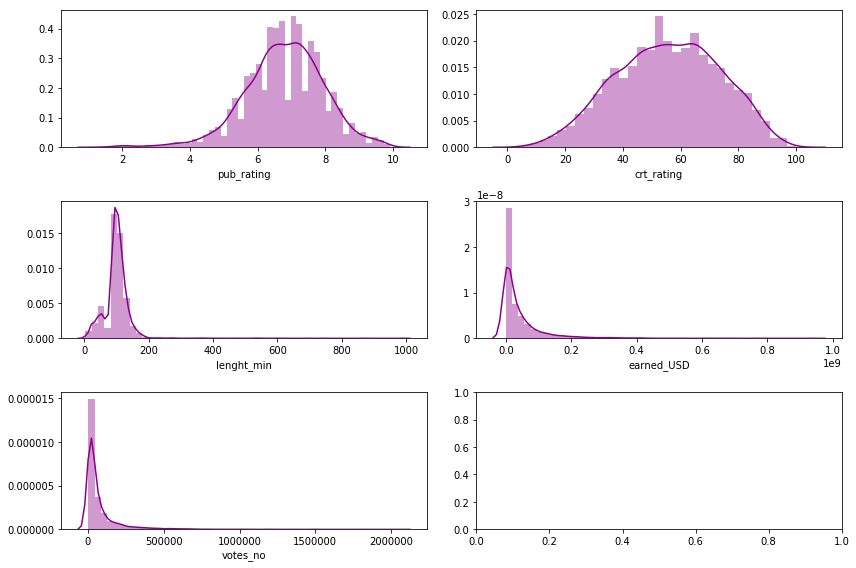

In [33]:
#Seaborn nie obsługuje nulowych wartości więc dla kolumn z nullowymi wartościami tworzymy nowe ramki danych
length_film = df[df['lenght_min'].notnull()]
crt_rating = df[df['crt_rating'].notnull()]
earned_USD = df[df['earned_USD'].notnull()]

fig, axes = plt.subplots(3, 2)
fig.set_size_inches(12, 8)

grapgh1 = sns.distplot(df.pub_rating, ax=axes[0, 0], color = 'darkmagenta')
grapgh2 = sns.distplot(crt_rating.crt_rating,  ax=axes[0, 1], color = 'darkmagenta')
grapgh3 = sns.distplot(length_film.lenght_min, ax=axes[1, 0], color = 'darkmagenta')
grapgh4 = sns.distplot(earned_USD.earned_USD,  ax=axes[1, 1], color = 'darkmagenta')
grapgh5 = sns.distplot(df.votes_no, ax=axes[2, 0], color = 'darkmagenta')

plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

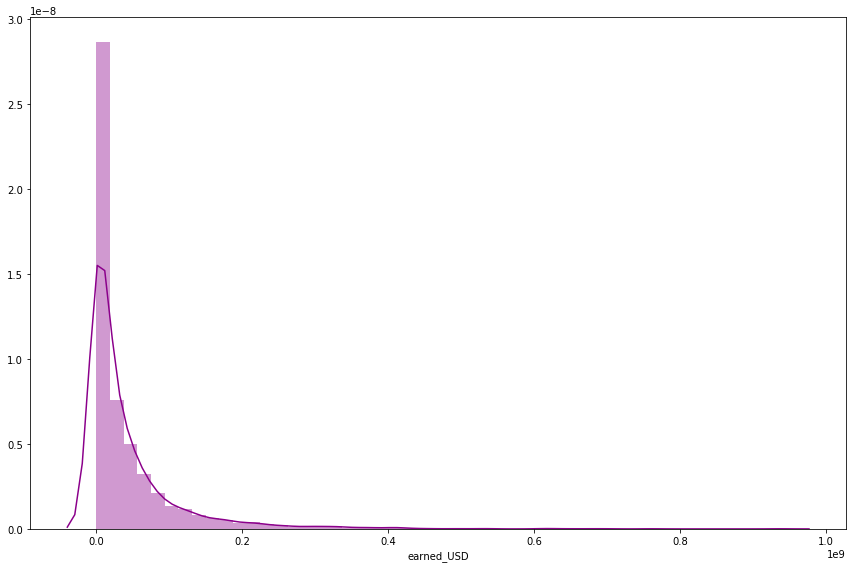

In [34]:
#Sprawdzamy rozmieszczenie poszczególnych wartości
crt_rating = df[df['earned_USD'].notnull()]

fig, axes = plt.subplots(figsize = (18,8))
fig.set_size_inches(12, 8)

grapgh3 = sns.distplot(crt_rating.earned_USD, ax=axes, color = 'darkmagenta')
plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

In [35]:
crt_rating = df[df['lenght_min'].notnull()]
crt_rating.describe()

,list_no,release_year,lenght_min,pub_rating,crt_rating,votes_no,earned_USD
count,6598.000000,6598.000000,6598.000000,6598.000000,4525.000000,6.598000e+03,4.383000e+03
mean,174.681722,2009.013186,100.248105,6.775144,55.649945,7.766709e+04,4.174048e+07
std,100.934992,5.481567,42.915410,1.155286,17.932452,1.316024e+05,7.080411e+07
min,1.000000,2000.000000,3.000000,1.300000,5.000000,3.571000e+03,4.410000e+02
25%,87.000000,2004.000000,88.000000,6.100000,43.000000,1.526325e+04,1.412198e+06
50%,174.000000,2009.000000,100.000000,6.800000,56.000000,3.059500e+04,1.536154e+07
75%,262.000000,2014.000000,115.000000,7.500000,69.000000,8.041750e+04,5.114180e+07
max,350.000000,2018.000000,990.000000,9.900000,100.000000,2.056323e+06,9.366622e+08


In [36]:
df[df['votes_no']>1500000]

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
350,1,2001,Władca pierścieni: Drużyna Pierścienia,178.0,"Adventure, Drama, Fantasy",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,92.0,1503617,315544750.0,Adventure,Elijah Wood,Peter Jackson
2800,1,2008,Mroczny rycerz,152.0,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,84.0,2056323,534858444.0,Action,Christian Bale,Christopher Nolan
3500,1,2010,Incepcja,148.0,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",8.8,74.0,1831110,292576195.0,Action,Leonardo DiCaprio,Christopher Nolan


In [37]:
df[df['earned_USD']>800000000]

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
5250,1,2015,Gwiezdne wojny: Przebudzenie mocy,136.0,"Action, Adventure, Fantasy",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",8.0,81.0,782195,936662225.0,Action,Daisy Ridley,J.J. Abrams


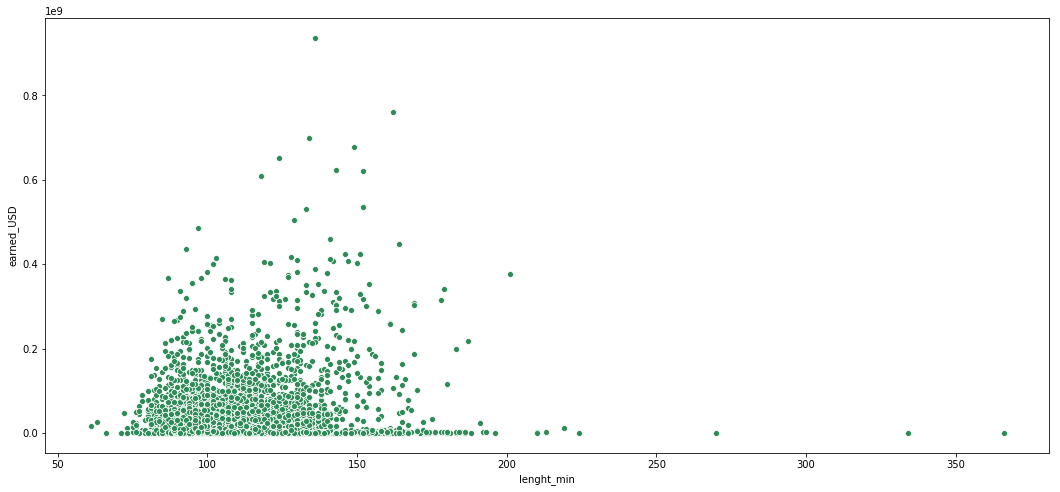

In [38]:
#Sprawdźmy teraz korelacje:
fig, ax = plt.subplots(figsize = (18,8))
sns.scatterplot(data=df, x='lenght_min', y='earned_USD', color= 'seagreen')

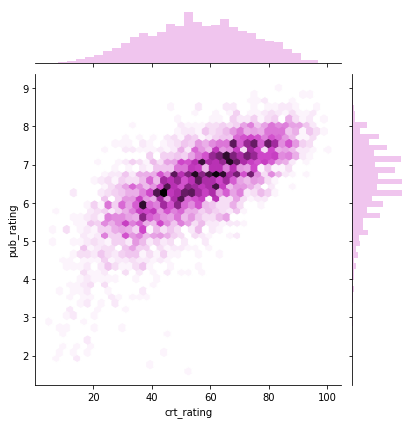

In [39]:
sns.jointplot(data=df, x='crt_rating', y='pub_rating', kind='hex',color = 'orchid')

In [40]:
df[(df['crt_rating']>40)& (df['pub_rating']<3)]

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
3268,119,2009,Dragonball: Ewolucja,85.0,"Action, Adventure, Fantasy",James Wong,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2.6,45.0,65725,9353573.0,Action,Justin Chatwin,James Wong
3434,285,2009,Jonas Brothers: The 3D Concert Experience,76.0,"Documentary, Music",Bruce Hendricks,"Nick Jonas, Joe Jonas, Kevin Jonas, John Taylor",2.1,45.0,17168,19161363.0,Documentary,Nick Jonas,Bruce Hendricks
3982,133,2011,Justin Bieber: Never Say Never,105.0,"Documentary, Music",Jon M. Chu,"Justin Bieber, Boyz II Men, Miley Cyrus, Sean ...",1.6,52.0,74980,73013910.0,Documentary,Justin Bieber,Jon M. Chu


In [41]:
df[(df['pub_rating']>6)& (df['crt_rating']<20)]

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
805,106,2002,Kung Pow: Enter the Fist,81.0,"Action, Comedy",Steve Oedekerk,"Steve Oedekerk, Fei Lung, Leo Lee, Ling-Ling H...",6.2,14.0,41558,16033556.0,Action,Steve Oedekerk,Steve Oedekerk
4087,238,2011,Odrobina nieba,106.0,"Comedy, Drama, Fantasy",Nicole Kassell,"Kate Hudson, Gael García Bernal, Kathy Bates, ...",6.3,14.0,26393,10011.0,Comedy,Kate Hudson,Nicole Kassell


In [42]:
k = df[(df['pub_rating']>4)& (df['crt_rating']<20)&(df['crt_rating'].notnull())]
print(len(k))
k[['genre_2']].groupby(['genre_2']).genre_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False)

56


,genre_2,total
4,Comedy,25
0,Action,13
11,Horror,8
5,Crime,4
7,Drama,4
2,Animation,1
1,Adventure,1
14,Mystery,0
19,Thriller,0
18,Short,0


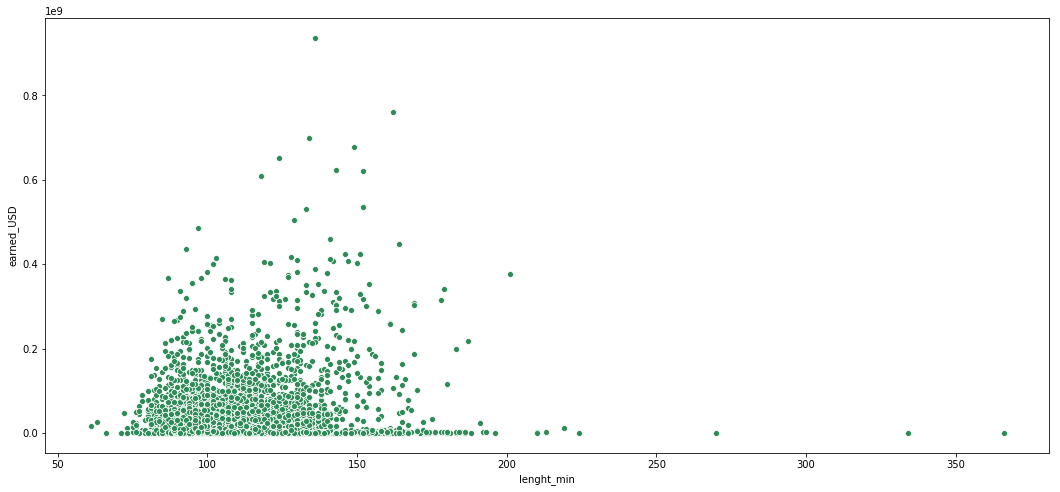

In [43]:
fig, ax = plt.subplots(figsize = (18,8))
sns.scatterplot(data=df, x='lenght_min', y='earned_USD', color= 'seagreen')

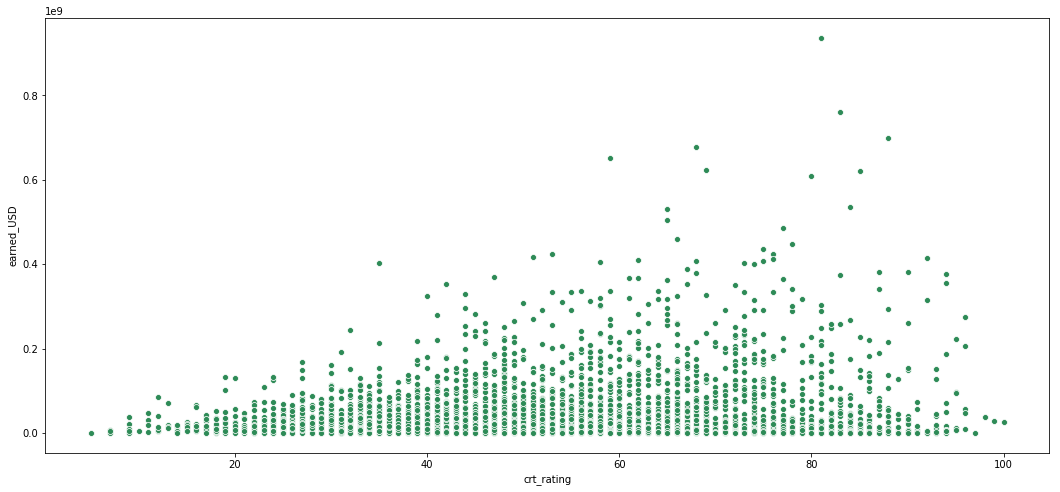

In [44]:
#Sprawdźmy teraz korelacje:
fig, ax = plt.subplots(figsize = (18,8))
sns.scatterplot(data=df, x='crt_rating', y='earned_USD', color= 'seagreen')

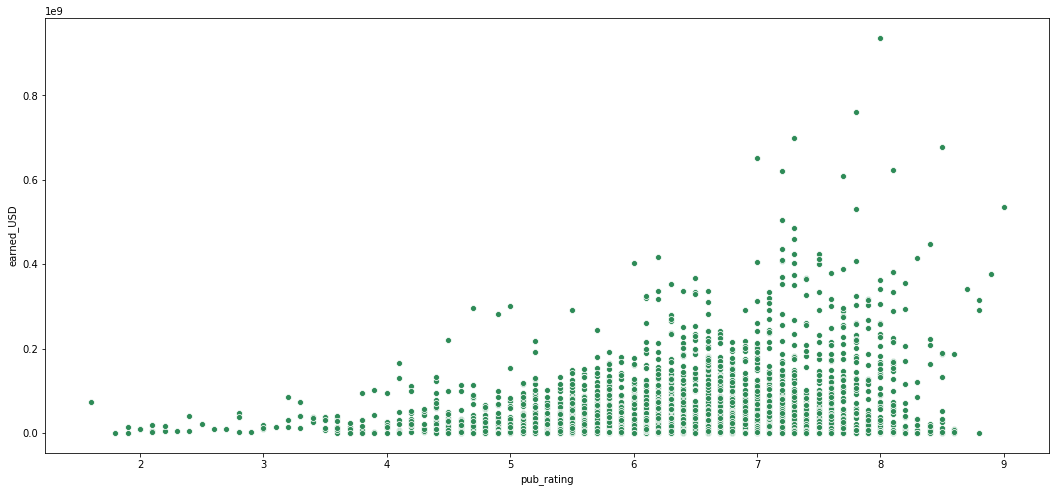

In [45]:
fig, ax = plt.subplots(figsize = (18,8))
sns.scatterplot(data=df, x='pub_rating', y='earned_USD', color= 'seagreen')

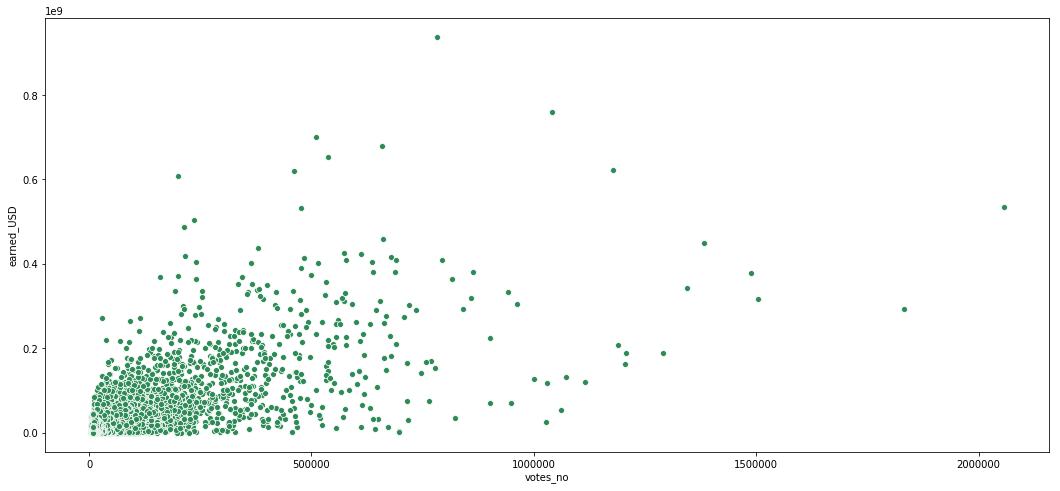

In [46]:
fig, ax = plt.subplots(figsize = (18,8))
sns.scatterplot(data=df, x='votes_no', y='earned_USD', color= 'seagreen')

In [47]:
df.sort_values(by=['votes_no'], ascending = False).head(3)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2
2800,1,2008,Mroczny rycerz,152.0,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,84.0,2056323,534858444.0,Action,Christian Bale,Christopher Nolan
3500,1,2010,Incepcja,148.0,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",8.8,74.0,1831110,292576195.0,Action,Leonardo DiCaprio,Christopher Nolan
350,1,2001,Władca pierścieni: Drużyna Pierścienia,178.0,"Adventure, Drama, Fantasy",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,92.0,1503617,315544750.0,Adventure,Elijah Wood,Peter Jackson


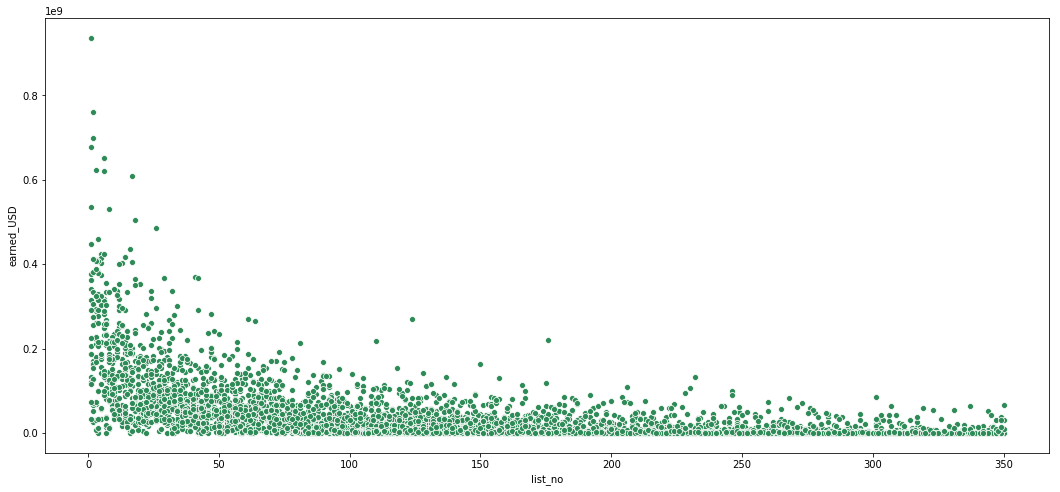

In [48]:
fig, ax = plt.subplots(figsize = (18,8))
sns.scatterplot(data=df, x='list_no', y='earned_USD', color= 'seagreen')

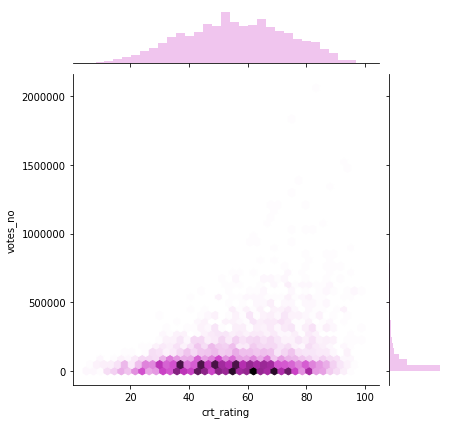

In [49]:
sns.jointplot(data=df, x='crt_rating', y='votes_no',  kind='hex',color = 'orchid')

list_no         5311
release_year    5311
name            5311
lenght_min      5259
genre           5311
directors       5311
actors          5311
pub_rating      5311
crt_rating      3314
votes_no        5311
earned_USD      3174
dtype: int64


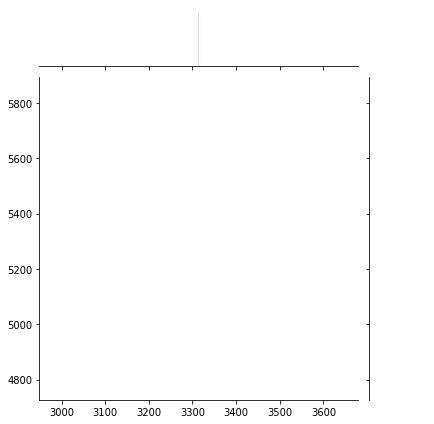

In [18]:
votes = df[df['votes_no']<100000].count()
print(votes)
sns.jointplot(data=votes, x='crt_rating', y='votes_no',  kind='hex',color = 'orchid')

In [50]:
#Tworzymy ramkę, żeby zbadać ile filmów z podziałem na gatunki dostało powyżej 90 głosow krytyków
l = df[df['crt_rating']>90].sort_values(by =['crt_rating'], ascending = False)
print(len(l))
l[['genre_2']].groupby(['genre_2']).genre_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False)

51


,genre_2,total
7,Drama,23
2,Animation,7
3,Biography,6
4,Comedy,5
5,Crime,4
0,Action,2
6,Documentary,2
1,Adventure,2
14,Mystery,0
19,Thriller,0


In [51]:
#Tworzymy ramkę, żeby zbadać ile filmów z podziałem na gatunki dostało powyżej 9 głosow widzów
l = df[df['pub_rating']>9].sort_values(by =['pub_rating'], ascending = False)
print(len(l))
l[['genre_2']].groupby(['genre_2']).genre_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False)

157


,genre_2,total
0,Action,71
5,Crime,37
7,Drama,20
6,Documentary,8
2,Animation,7
4,Comedy,7
1,Adventure,6
18,Short,1
14,Mystery,0
19,Thriller,0


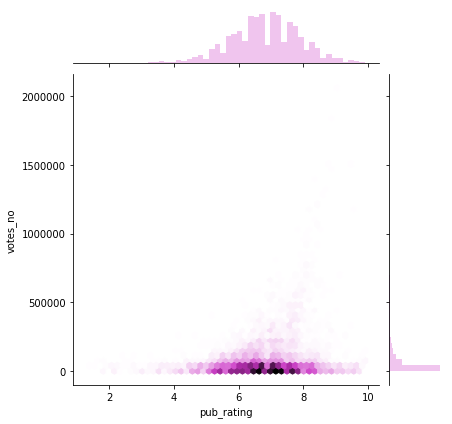

In [52]:
sns.jointplot(data=df, x='pub_rating', y='votes_no',  kind='hex',color = 'orchid')

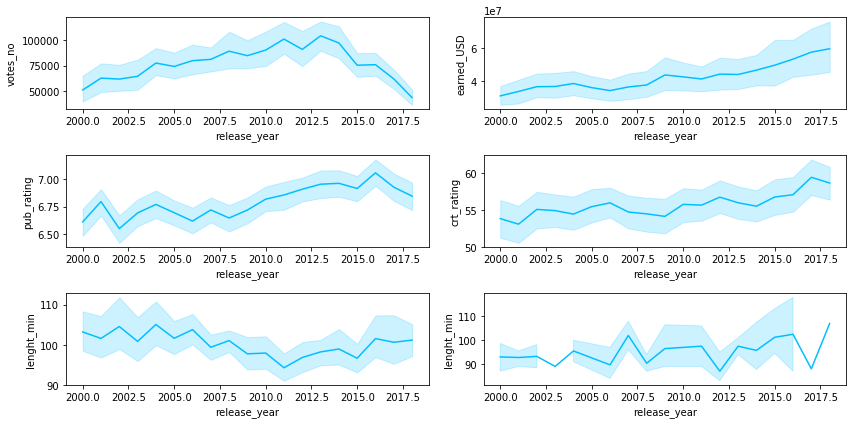

In [53]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(12, 6)

grapgh1 = sns.lineplot(data=df, x="release_year", y="votes_no", ax=axes[0, 0], color='deepskyblue')
grapgh2 = sns.lineplot(data=df, x="release_year", y="earned_USD",  ax=axes[0, 1], color='deepskyblue')
grapgh3 = sns.lineplot(data=df, x="release_year", y="pub_rating", ax=axes[1, 0], color='deepskyblue')
grapgh4 = sns.lineplot(data=df, x="release_year", y="crt_rating",  ax=axes[1, 1], color='deepskyblue')
grapgh5 = sns.lineplot(data=df, x="release_year", y="lenght_min", ax=axes[2, 0], color='deepskyblue')
grapgh5 = sns.lineplot(data=k, x="release_year", y="lenght_min", ax=axes[2, 1], color='deepskyblue')##WYłącznie dla seriali


plt.tight_layout() 

In [54]:
#Zbadamy teraz dystrybucję gatunków na przestrzeni lat. Mamy 21 gatunków filmów. Zobaczmy liczby:
df[['genre_2']].groupby(['genre_2']).genre_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False)


,genre_2,total
4,Comedy,1618
0,Action,1521
7,Drama,1271
5,Crime,578
2,Animation,474
3,Biography,333
1,Adventure,323
11,Horror,277
6,Documentary,156
14,Mystery,30


In [55]:
#Nie chcmey wszytskich gatunków na jednym grafie, gdyż wprowadzało by to za dużo chaosu. Stworzymy więc 2 grafy. 
#Najpierw stworzymy listę (naczęściej występowany gatunek jako pierwszy obiekt w liście), którą uzyjemy następnie 
#w pętli podczas tworzenia grafów.

words=df[['genre_2']].groupby(['genre_2']).genre_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False)
mylist = list(words.genre_2)
print(mylist)
len(mylist)

['Comedy', 'Action', 'Drama', 'Crime', 'Animation', 'Biography', 'Adventure', 'Horror', 'Documentary', 'Mystery', 'Fantasy', 'Short', 'Sci-Fi', 'Romance', 'Game-Show', 'Thriller', 'Family', 'Reality-TV', 'Musical', 'Music', 'War']


21

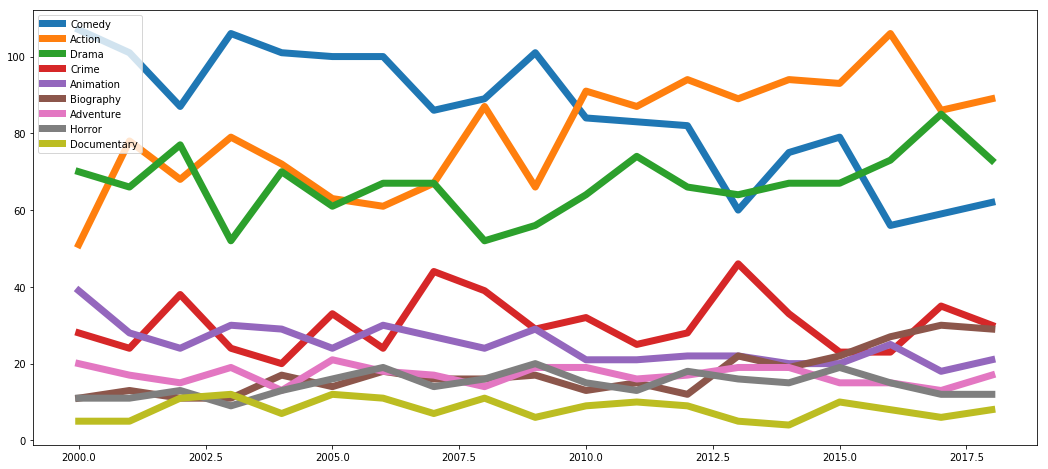

In [56]:
fig, ax = plt.subplots(figsize = (18,8))
ax.set_facecolor('white')

for i in mylist[:-12]:
    df_category = df[df['genre_2'].str.contains(i)]
    df_category = (df_category[df_category['genre_2'].notnull()][['release_year', 'genre_2']].groupby('release_year')).count()
    plt.plot(df_category, label=i, linewidth=7.0)
    plt.legend(loc='upper left')
 
        

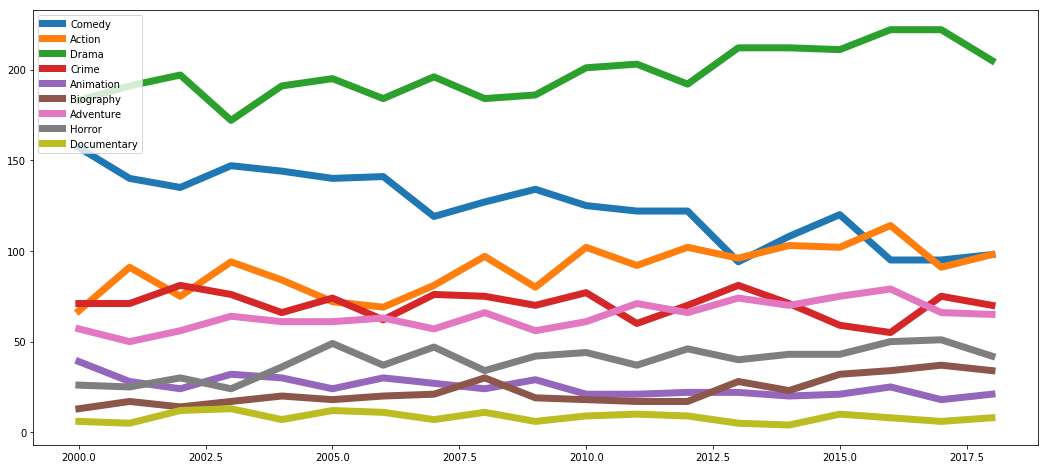

In [57]:
fig, ax = plt.subplots(figsize = (18,8))
ax.set_facecolor('white')
for i in mylist[:-12]:
    df_category = df[df['genre'].str.contains(i)]
    df_category = (df_category[df_category['genre'].notnull()][['release_year', 'genre']].groupby('release_year')).count()
    plt.plot(df_category, label=i, linewidth=7.0)
    plt.legend(loc='upper left')

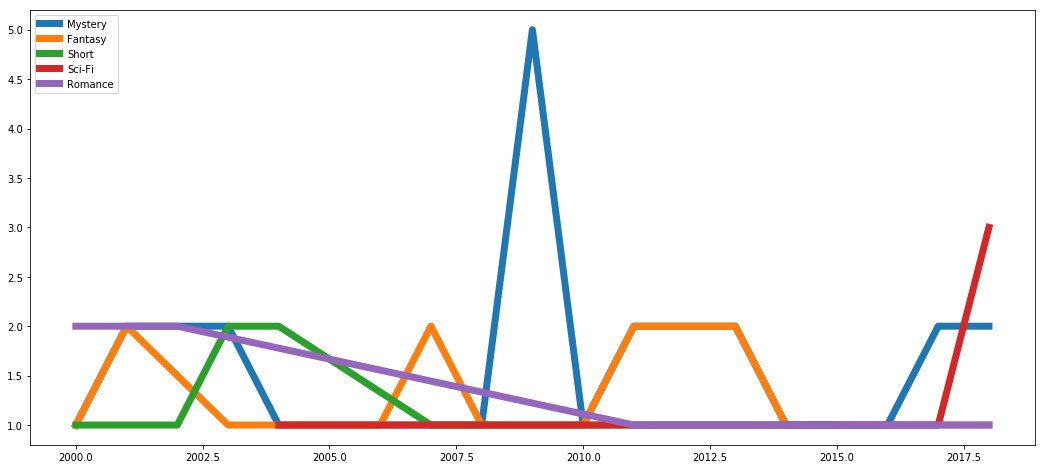

In [56]:
fig, ax = plt.subplots(figsize = (18,8))
ax.set_facecolor('white')
for i in mylist[-12:-7]:
    df_category = df[df['genre_2'].str.contains(i)]
    df_category = (df_category[df_category['genre_2'].notnull()][['release_year', 'genre_2']].groupby('release_year')).count()
    plt.plot(df_category, label=i, linewidth=7.0)
    plt.legend(loc='upper left')   

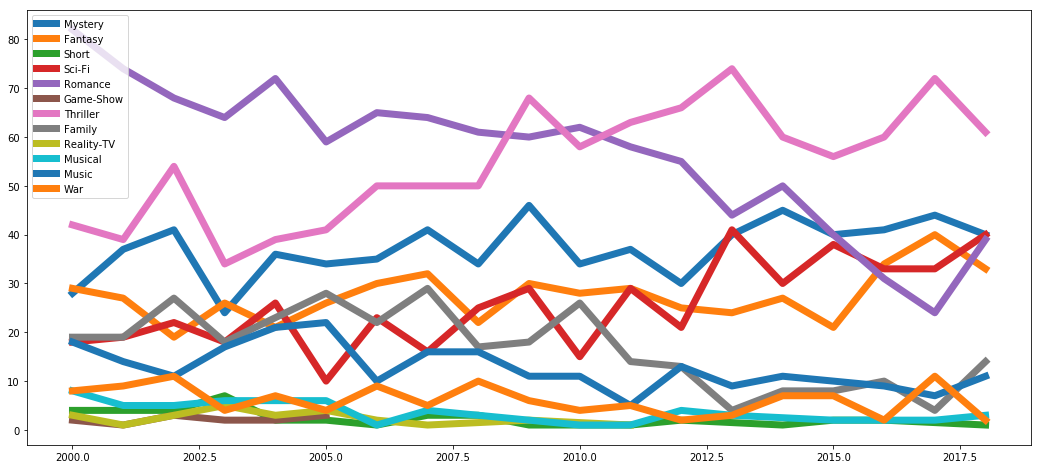

In [58]:
fig, ax = plt.subplots(figsize = (18,8))
ax.set_facecolor('white')

for i in mylist[-12:]:
    df_category = df[df['genre'].str.contains(i)]
    df_category = (df_category[df_category['genre'].notnull()][['release_year', 'genre']].groupby('release_year')).count()
    plt.plot(df_category, label=i, linewidth=7.0)
    plt.legend(loc='upper left')   

In [59]:
round(df[['earned_USD']].describe())

,earned_USD
count,4383.0
mean,41740483.0
std,70804113.0
min,441.0
25%,1412198.0
50%,15361537.0
75%,51141800.0
max,936662225.0


In [62]:
#Podzielmy teraz dochody filmu na 4 części, które zapiszemy w nowe kolumnie
df['earned_types'] = df['earned_USD']

min_value = df['earned_types'].min()
first_quantile = df['earned_types'].describe()[4]
second_quantile = df['earned_types'].describe()[5]
third_quantile = df['earned_types'].describe()[6]
max_value = df['earned_types'].max()

type_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]

type_names = [ 'Low', 'Medium', 'Medium-High', 'High'] 
# Creates budget_levels column
#name = '{}_levels'.format('earned_USD')
df['earned_types'] = pd.cut(df['earned_types'], type_edges, labels=type_names, include_lowest = True)
df.head(2)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2,earned_types
0,1,2000,Gladiator,155.0,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen...",8.5,67.0,1206948,187705427.0,Action,Russell Crowe,Ridley Scott,High
1,2,2000,Memento,113.0,"Mystery, Thriller",Christopher Nolan,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",8.5,80.0,1027296,25544867.0,Mystery,Guy Pearce,Christopher Nolan,Medium-High


In [63]:
df_2018 = df[(df['release_year'] >= 2013)]
df_2018 = df_2018[df_2018['earned_types'].notnull()]

data = (df_2018[df_2018['pub_rating'].notnull()][['release_year', 'pub_rating', 'earned_types']].groupby(['release_year', 'earned_types']).mean())
data

pub_rating
release_year earned_types            
2013         Low             6.609859
             Medium          6.681132
             Medium-High     6.433333
             High            6.740909
2014         Low             6.740984
             Medium          6.686957
             Medium-High     6.376471
             High            6.676563
2015         Low             6.748980
             Medium          6.766102
             Medium-High     6.395918
             High            6.641509
2016         Low             6.765517
             Medium          6.743939
             Medium-High     6.341667
             High            6.743939
2017         Low             6.446875
             Medium          6.586667
             Medium-High     6.409804
             High            6.794444
2018         Low             7.044444
             Medium          6.570000
             Medium-High     6.446296
             High            6.672222

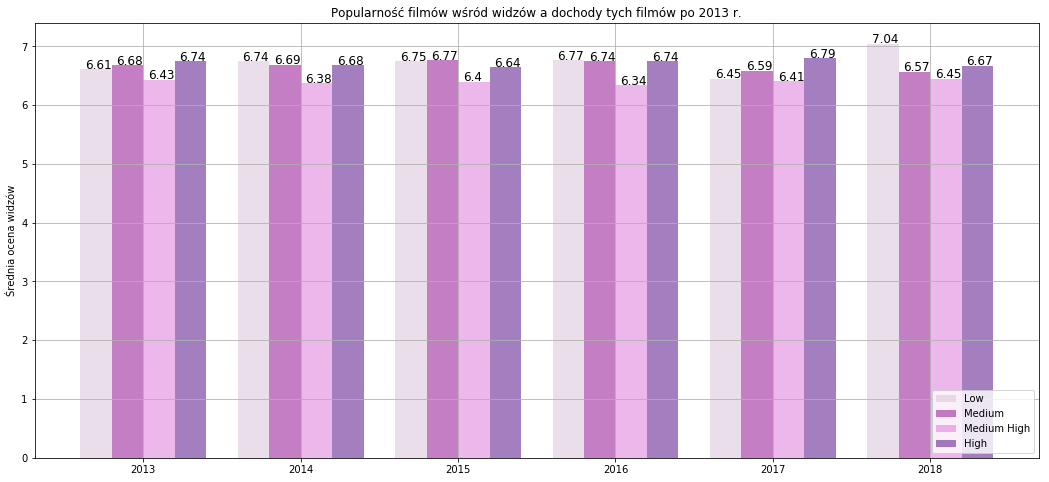

In [64]:
#Pozycja każdego ze słupu
pos = list(range(len(data.query('earned_types =="Low"'))))
width = 0.2
bar1 = data.query('earned_types =="Low"')['pub_rating']
bar2 = data.query('earned_types =="Medium"')['pub_rating']
bar3 = data.query('earned_types =="Medium-High"')['pub_rating']
bar4 = data.query('earned_types =="High"')['pub_rating']

fig, ax = plt.subplots(figsize=(18,8))

# Storzenie słupów
plt.bar(pos, bar1, width, alpha=0.5, color=('thistle'), label= 'Low') 
plt.bar([p + width for p in pos],bar2 ,width, alpha=0.5, color=('darkmagenta'), label='Medium') 
plt.bar([p + width*2 for p in pos], bar3,width,alpha=0.5, color=('orchid'), label='Medium High') 
plt.bar([p + width*3 for p in pos], bar4, width, alpha=0.5,color=('indigo'), label='High')

#Nazwa dla osi y
ax.set_ylabel('Średnia ocena widzów')

# Set the chart's title
ax.set_title('Popularność filmów wśród widzów a dochody tych filmów po 2013 r.')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2013,2014,2015,2016,2017,2018])
for p in pos:
    plt.text(x=p-0.07, y = bar1[p]+0.01, s = round(bar1[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width-0.07, y = bar2[p]+0.01, s = round(bar2[p],2), size = 12)

for p in pos:
    plt.text(x=p+width*2-0.07, y = bar3[p]+0.01, s = round(bar3[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width*3-0.07, y = bar4[p]+0.01, s = round(bar4[p],2), size = 12)
  
plt.legend( loc='lower right')
plt.grid()
plt.show()

In [65]:
df_2018 = df[(df['release_year'] >= 2013)]
df_2018 = df_2018[df_2018['earned_types'].notnull()]

data = (df_2018[df_2018['crt_rating'].notnull()][['release_year', 'crt_rating', 'earned_types']].groupby(['release_year', 'earned_types']).mean())
data

crt_rating
release_year earned_types            
2013         Low            58.746269
             Medium         62.893617
             Medium-High    51.893617
             High           54.772727
2014         Low            57.355932
             Medium         63.261905
             Medium-High    51.529412
             High           55.625000
2015         Low            64.465116
             Medium         60.980769
             Medium-High    51.653061
             High           57.641509
2016         Low            62.920000
             Medium         62.566667
             Medium-High    50.479167
             High           57.151515
2017         Low            66.965517
             Medium         64.275000
             Medium-High    54.260000
             High           59.962963
2018         Low            71.785714
             Medium         60.907407
             Medium-High    56.370370
             High           58.648148

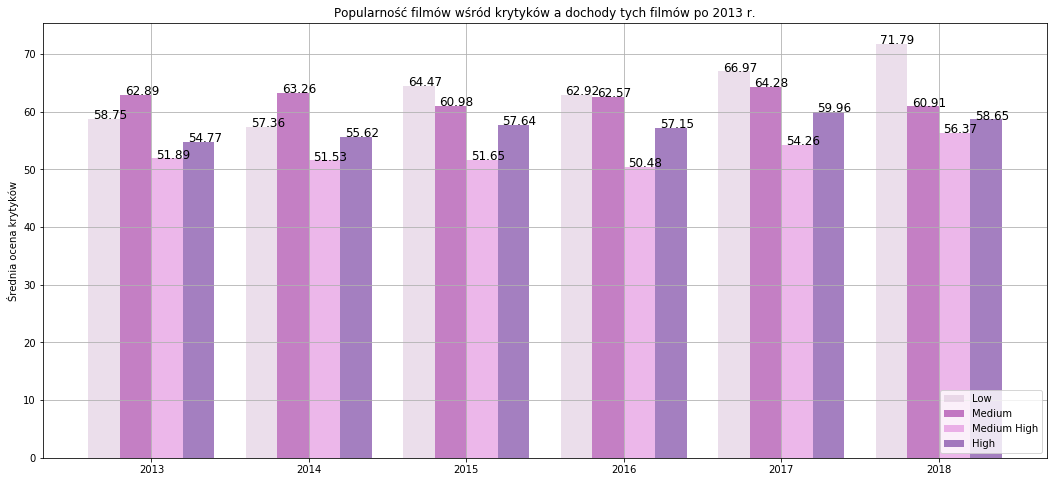

In [66]:
#Pozycja każdego ze słupu
pos = list(range(len(data.query('earned_types =="Low"'))))
width = 0.2
bar1 = data.query('earned_types =="Low"')['crt_rating']
bar2 = data.query('earned_types =="Medium"')['crt_rating']
bar3 = data.query('earned_types =="Medium-High"')['crt_rating']
bar4 = data.query('earned_types =="High"')['crt_rating']

fig, ax = plt.subplots(figsize=(18,8))

# Storzenie słupów
plt.bar(pos, bar1, width, alpha=0.5, color=('thistle'), label= 'Low') 
plt.bar([p + width for p in pos],bar2 ,width, alpha=0.5, color=('darkmagenta'), label='Medium') 
plt.bar([p + width*2 for p in pos], bar3,width,alpha=0.5, color=('orchid'), label='Medium High') 
plt.bar([p + width*3 for p in pos], bar4, width, alpha=0.5,color=('indigo'), label='High')

#Nazwa dla osi y
ax.set_ylabel('Średnia ocena krytyków')

# Set the chart's title
ax.set_title('Popularność filmów wśród krytyków a dochody tych filmów po 2013 r.')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2013,2014,2015,2016,2017,2018])
for p in pos:
    plt.text(x=p-0.07, y = bar1[p]+0.01, s = round(bar1[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width-0.07, y = bar2[p]+0.01, s = round(bar2[p],2), size = 12)

for p in pos:
    plt.text(x=p+width*2-0.07, y = bar3[p]+0.01, s = round(bar3[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width*3-0.07, y = bar4[p]+0.01, s = round(bar4[p],2), size = 12)
  
plt.legend( loc='lower right')
plt.grid()
plt.show()

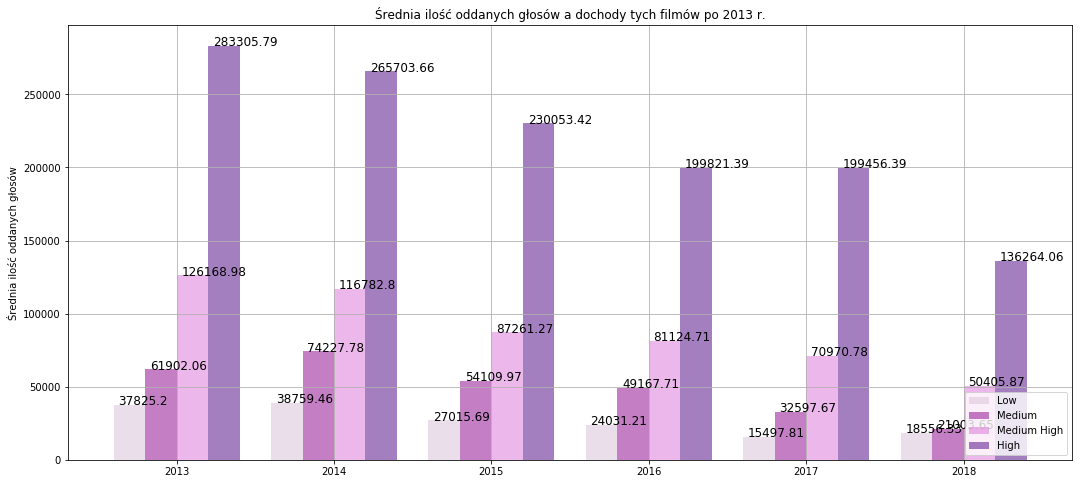

In [67]:
df_2018 = df[(df['release_year'] >= 2013)]
df_2018 = df_2018[df_2018['earned_types'].notnull()]

data = (df_2018[df_2018['votes_no'].notnull()][['release_year', 'votes_no', 'earned_types']].groupby(['release_year', 'earned_types']).mean())

#Pozycja każdego ze słupu
pos = list(range(len(data.query('earned_types =="Low"'))))
width = 0.2
bar1 = data.query('earned_types =="Low"')['votes_no']
bar2 = data.query('earned_types =="Medium"')['votes_no']
bar3 = data.query('earned_types =="Medium-High"')['votes_no']
bar4 = data.query('earned_types =="High"')['votes_no']

fig, ax = plt.subplots(figsize=(18,8))

# Storzenie słupów
plt.bar(pos, bar1, width, alpha=0.5, color=('thistle'), label= 'Low') 
plt.bar([p + width for p in pos],bar2 ,width, alpha=0.5, color=('darkmagenta'), label='Medium') 
plt.bar([p + width*2 for p in pos], bar3,width,alpha=0.5, color=('orchid'), label='Medium High') 
plt.bar([p + width*3 for p in pos], bar4, width, alpha=0.5,color=('indigo'), label='High')

#Nazwa dla osi y
ax.set_ylabel('Średnia ilość oddanych głosów')

# Set the chart's title
ax.set_title('Średnia ilość oddanych głosów a dochody tych filmów po 2013 r.')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2013,2014,2015,2016,2017,2018])
for p in pos:
    plt.text(x=p-0.07, y = bar1[p]+0.01, s = round(bar1[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width-0.07, y = bar2[p]+0.01, s = round(bar2[p],2), size = 12)

for p in pos:
    plt.text(x=p+width*2-0.07, y = bar3[p]+0.01, s = round(bar3[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width*3-0.07, y = bar4[p]+0.01, s = round(bar4[p],2), size = 12)
  
plt.legend( loc='lower right')
plt.grid()
plt.show()

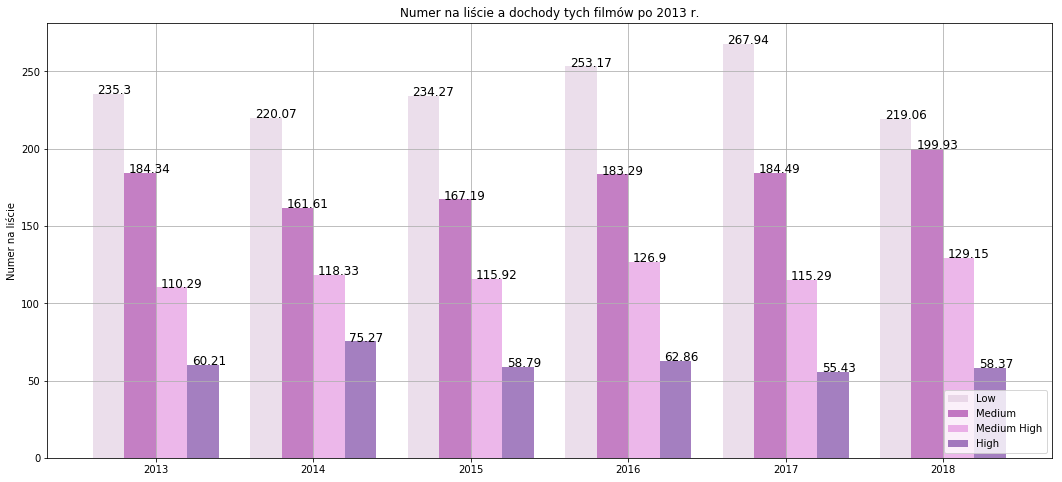

In [68]:
df_2018 = df[(df['release_year'] >= 2013)]
df_2018 = df_2018[df_2018['earned_types'].notnull()]

data = (df_2018[df_2018['list_no'].notnull()][['release_year', 'list_no', 'earned_types']].groupby(['release_year', 'earned_types']).mean())

#Pozycja każdego ze słupu
pos = list(range(len(data.query('earned_types =="Low"'))))
width = 0.2
bar1 = data.query('earned_types =="Low"')['list_no']
bar2 = data.query('earned_types =="Medium"')['list_no']
bar3 = data.query('earned_types =="Medium-High"')['list_no']
bar4 = data.query('earned_types =="High"')['list_no']

fig, ax = plt.subplots(figsize=(18,8))

# Storzenie słupów
plt.bar(pos, bar1, width, alpha=0.5, color=('thistle'), label= 'Low') 
plt.bar([p + width for p in pos],bar2 ,width, alpha=0.5, color=('darkmagenta'), label='Medium') 
plt.bar([p + width*2 for p in pos], bar3,width,alpha=0.5, color=('orchid'), label='Medium High') 
plt.bar([p + width*3 for p in pos], bar4, width, alpha=0.5,color=('indigo'), label='High')

#Nazwa dla osi y
ax.set_ylabel('Numer na liście')

# Set the chart's title
ax.set_title('Numer na liście a dochody tych filmów po 2013 r.')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2013,2014,2015,2016,2017,2018])
for p in pos:
    plt.text(x=p-0.07, y = bar1[p]+0.01, s = round(bar1[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width-0.07, y = bar2[p]+0.01, s = round(bar2[p],2), size = 12)

for p in pos:
    plt.text(x=p+width*2-0.07, y = bar3[p]+0.01, s = round(bar3[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width*3-0.07, y = bar4[p]+0.01, s = round(bar4[p],2), size = 12)
  
plt.legend( loc='lower right')
plt.grid()
plt.show()

In [69]:
#Zeby wykonać obliczenia dla Gatunkó,m trzeba kategorie smienić na stringi (w przeciwnym razie, wylicza dane
#dla wszystkich kategorii)
df.genre_2 = df.genre_2.astype(str)
df_genre_2 = df[(df['release_year'] >= 2013)]
df_genre_2 = df_genre_2[(df_genre_2['genre_2'] == 'Comedy')|(df_genre_2['genre_2'] == 'Action')|(df_genre_2['genre_2'] == 'Drama')|(df_genre_2['genre_2'] == 'Crime')]
data = df_genre_2[df_genre_2['earned_USD'].notnull()][['release_year','earned_USD', 'genre_2']].groupby(['release_year', 'genre_2']).mean()
data['earned_USD'] = (data['earned_USD']/1000000)

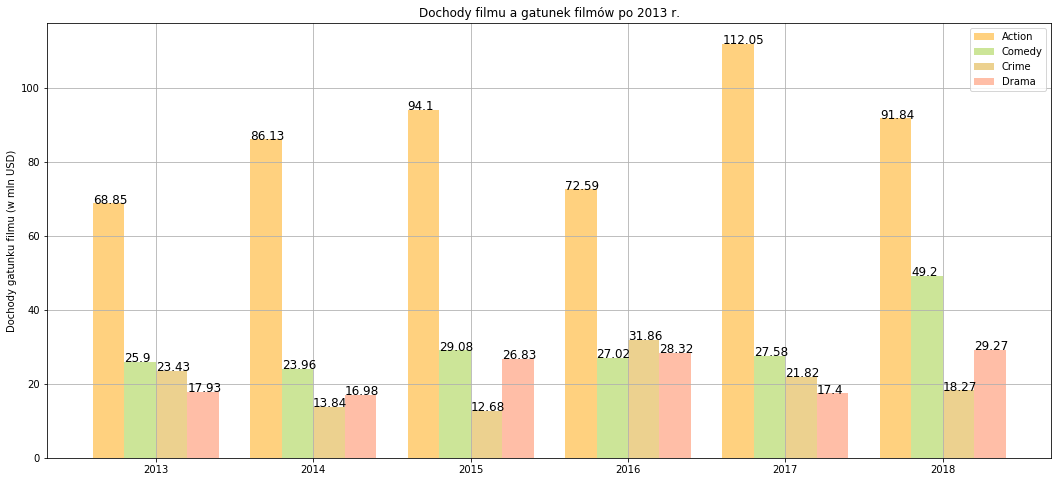

In [70]:
#Pozycja każdego ze słupu
pos = list(range(len(data.query('genre_2 =="Action"'))))
width = 0.2
bar1 = data.query('genre_2 =="Action"')['earned_USD']
bar2 = data.query('genre_2 =="Comedy"')['earned_USD']
bar3 = data.query('genre_2 =="Crime"')['earned_USD']
bar4 = data.query('genre_2 =="Drama"')['earned_USD']

fig, ax = plt.subplots(figsize=(18,8))

# Storzenie słupów
plt.bar(pos, bar1, width, alpha=0.5, color=('orange'), label= 'Action') 
plt.bar([p + width for p in pos],bar2 ,width, alpha=0.5, color=('yellowgreen'), label='Comedy') 
plt.bar([p + width*2 for p in pos], bar3,width,alpha=0.5, color=('goldenrod'), label='Crime') 
plt.bar([p + width*3 for p in pos], bar4, width, alpha=0.5,color=('coral'), label='Drama')

#Nazwa dla osi y
ax.set_ylabel('Dochody gatunku filmu (w mln USD)')

# Set the chart's title
ax.set_title('Dochody filmu a gatunek filmów po 2013 r.')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2013,2014,2015,2016,2017,2018])
for p in pos:
    plt.text(x=p-0.1, y = bar1[p]+0.01, s = round(bar1[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width-0.1, y = bar2[p]+0.01, s = round(bar2[p],2), size = 12)

for p in pos:
    plt.text(x=p+width*2-0.1, y = bar3[p]+0.01, s = round(bar3[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width*3-0.1, y = bar4[p]+0.01, s = round(bar4[p],2), size = 12)
  
plt.legend( loc='upper right')
plt.grid()
plt.show()

In [71]:
df.genre_2 = df.genre_2.astype(str)
df_genre_2 = df[(df['release_year'] <= 2005)]
df_genre_2 = df_genre_2[(df_genre_2['genre_2'] == 'Comedy')|(df_genre_2['genre_2'] == 'Action')|(df_genre_2['genre_2'] == 'Drama')|(df_genre_2['genre_2'] == 'Crime')]
data = df_genre_2[df_genre_2['earned_USD'].notnull()][['release_year','earned_USD', 'genre_2']].groupby(['release_year', 'genre_2']).mean()
data['earned_USD'] = (data['earned_USD']/1000000)

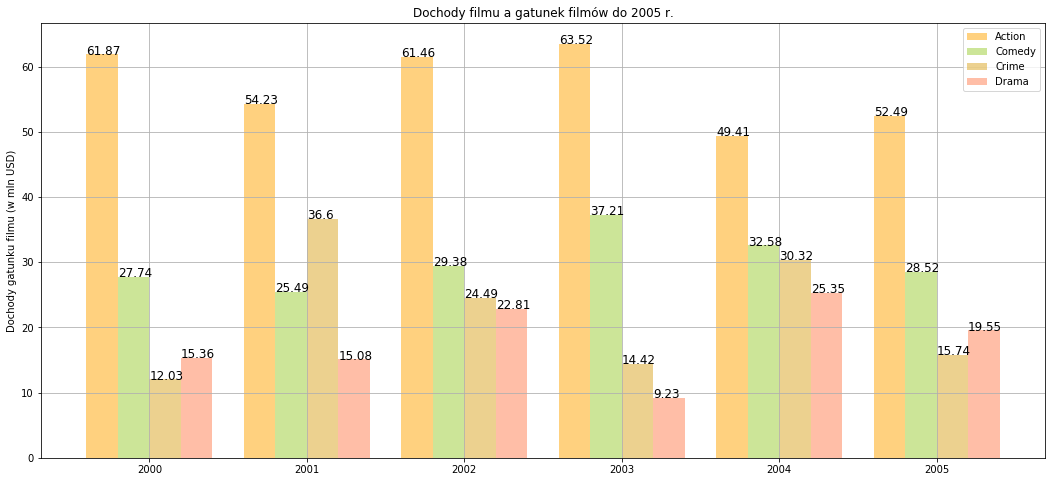

In [72]:
#Pozycja każdego ze słupu
pos = list(range(len(data.query('genre_2 =="Action"'))))
width = 0.2
bar1 = data.query('genre_2 =="Action"')['earned_USD']
bar2 = data.query('genre_2 =="Comedy"')['earned_USD']
bar3 = data.query('genre_2 =="Crime"')['earned_USD']
bar4 = data.query('genre_2 =="Drama"')['earned_USD']

fig, ax = plt.subplots(figsize=(18,8))

# Storzenie słupów
plt.bar(pos, bar1, width, alpha=0.5, color=('orange'), label= 'Action') 
plt.bar([p + width for p in pos],bar2 ,width, alpha=0.5, color=('yellowgreen'), label='Comedy') 
plt.bar([p + width*2 for p in pos], bar3,width,alpha=0.5, color=('goldenrod'), label='Crime') 
plt.bar([p + width*3 for p in pos], bar4, width, alpha=0.5,color=('coral'), label='Drama')

#Nazwa dla osi y
ax.set_ylabel('Dochody gatunku filmu (w mln USD)')

# Set the chart's title
ax.set_title('Dochody filmu a gatunek filmów do 2005 r.')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2000,2001,2002,2003,2004,2005])
for p in pos:
    plt.text(x=p-0.1, y = bar1[p]+0.01, s = round(bar1[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width-0.1, y = bar2[p]+0.01, s = round(bar2[p],2), size = 12)

for p in pos:
    plt.text(x=p+width*2-0.1, y = bar3[p]+0.01, s = round(bar3[p],2), size = 12)
    
for p in pos:
    plt.text(x=p+width*3-0.1, y = bar4[p]+0.01, s = round(bar4[p],2), size = 12)
  
plt.legend( loc='upper right')
plt.grid()
plt.show()

In [74]:
#Dochody dla Sci-Fi
df.genre = df.genre.astype(str)
df_genre_2 = df[(df['genre'].str.contains('Sci-Fi'))]
data = df_genre_2[df_genre_2['earned_USD'].notnull()][['release_year','earned_USD']].groupby(['release_year']).mean()
data['earned_USD'] = (data['earned_USD']/1000000)
data

,earned_USD
release_year,
2000,57.775810
2001,44.310913
2002,71.310976
2003,91.798011
2004,63.471043
2005,55.673735
2006,43.816654
2007,84.652273
2008,63.862243


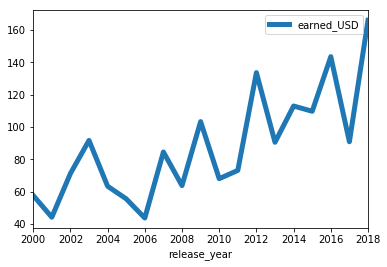

In [75]:
data.plot(linewidth=5)

In [85]:
#SPrawdzamy średnią dochodu dla każdego gatunku
genr= df[df['earned_USD'].notnull()][['earned_USD','genre_2']].groupby(['genre_2']).mean().reset_index().sort_values(by=['earned_USD'], ascending=False)
genr['earned_USD']=round(genr['earned_USD'])
genr


,genre_2,earned_USD
8,Family,257213072.0
2,Animation,99869637.0
1,Adventure,69582019.0
0,Action,69104539.0
12,Mystery,59427816.0
10,Horror,32846277.0
4,Comedy,29620442.0
3,Biography,28838891.0
9,Fantasy,25711782.0
5,Crime,20798311.0


In [86]:
#Sprawdzamy dochody dla każdego roku po 2013 dla gatunków najwyżej na liscie
df.genre_2 = df.genre_2.astype(str)
df_genre_2 = df[(df['release_year'] >= 2013)]
df_genre_2 = df_genre_2[(df_genre_2['genre_2'] == 'Family')|(df_genre_2['genre_2'] == 'Animation')|(df_genre_2['genre_2'] == 'Adventure')|(df_genre_2['genre_2'] == 'Action')|(df_genre_2['genre_2'] == 'Mystery')]
data = df_genre_2[df_genre_2['earned_USD'].notnull()][['release_year','earned_USD', 'genre_2']].groupby(['release_year', 'genre_2']).mean()
data['earned_USD'] = (data['earned_USD']/1000000)
data

earned_USD
release_year genre_2              
2013         Action      68.854322
             Adventure   65.634520
             Animation  121.218544
             Mystery      1.007088
2014         Action      86.133301
             Adventure   72.572715
             Animation  104.595297
             Mystery      5.981749
2015         Action      94.095197
             Adventure   52.933798
             Animation  112.512221
2016         Action      72.589366
             Adventure   74.730967
             Animation  128.459008
2017         Action     112.052250
             Adventure   38.079331
             Animation  111.147923
             Family     504.014165
2018         Action      91.844191
             Adventure   46.749623
             Animation  144.581108

In [87]:
#Torzymy listę z 5 najbardziej dochdowymi gatunkami, aby użyć ją do wykresu
words=df_genre_2[df_genre_2['earned_USD'].notnull()][['earned_USD','genre_2']].groupby(['genre_2']).mean().reset_index().sort_values(by=['earned_USD'], ascending=False).head(5)
mylist = list(words.genre_2)
print(mylist)
len(mylist)

['Family', 'Animation', 'Action', 'Adventure', 'Mystery']


5

In [95]:
#Tworzymy nową ramkę z gatunkami, ich średnią zarobków w danym roku
gnr= df[df['earned_USD'].notnull()][['release_year','genre_2','earned_USD']].groupby(['release_year','genre_2']).mean().reset_index()
gnr['earned_USD']=round(gnr['earned_USD'])

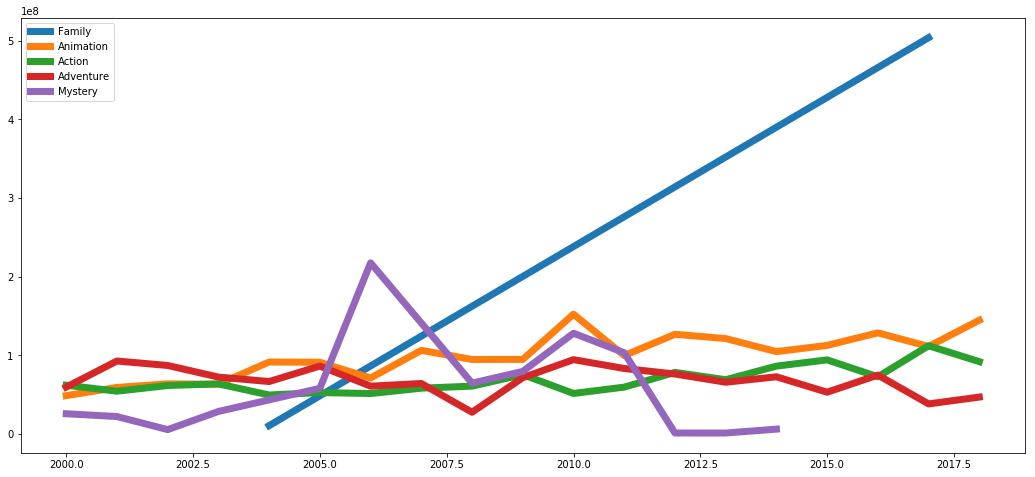

In [92]:
#Tworzymy wykres na pdostawie ramki gnr, dla gatunków z listy mylist
fig, ax = plt.subplots(figsize = (18,8))
ax.set_facecolor('white')

for i in mylist:
    df_gnrs = gnr[gnr['genre_2'].str.contains(i)]
    y = df_gnrs['earned_USD']
    x = df_gnrs['release_year']
    plt.plot(x,y, label=i, linewidth=7.0)
    plt.legend(loc='upper left')

In [96]:
#Sprawdźmy ile filmy rodzinne zarobiły śrendio w każdym roku
gnr[gnr['genre_2']=='Family']

,release_year,genre_2,earned_USD
54,2004,Family,10411980.0
192,2017,Family,504014165.0


In [97]:
#Zobaczmy najczęściej występujących aktorów. Najpierw uzyjmy stworzonej wczęsniej kolumny dla aktorów:
#@#Chcemy wykluczyć seriale, więc dajemy warunek na długość filmu
df_actors = df[(df['lenght_min'] > 60)]
df_actors[['actors_2']].groupby(['actors_2']).actors_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False).head(10)


,actors_2,total
2054,Nicolas Cage,33
62,Adam Sandler,29
2469,Shah Rukh Khan,27
90,Akshay Kumar,24
1801,Mark Wahlberg,24
2814,Will Ferrell,23
323,Ben Stiller,23
715,Denzel Washington,22
1360,Johnny Depp,22
1835,Matt Damon,22


In [98]:
#Sprawdżmy też najpopularniejszych aktoró w 1 10 filmów:
df_actors = df_actors[df_actors['list_no'] <= 10]
df_actors[['actors_2']].groupby(['actors_2']).actors_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False).head(10)


,actors_2,total
1670,Leonardo DiCaprio,7
2293,Robert Downey Jr.,7
525,Christian Bale,5
638,Daniel Radcliffe,5
1360,Johnny Depp,4
2691,Tom Cruise,4
390,Brad Pitt,4
2818,Will Smith,4
2126,Patrick Stewart,4
1265,Jesse Eisenberg,3


In [99]:
#Sprawdżmy też najpopularniejszych aktorów w 1 10 filmów w ostatnich 5 latach
df_actors = df_actors[(df_actors['list_no'] <= 10)&(df_actors['release_year'] >= 2013)]
df_actors[['actors_2']].groupby(['actors_2']).actors_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False).head(10)


,actors_2,total
2293,Robert Downey Jr.,3
522,Chris Pratt,3
2697,Tom Hardy,2
1670,Leonardo DiCaprio,2
312,Ben Affleck,2
607,Daisy Ridley,2
510,Chris Evans,2
514,Chris Hemsworth,2
2141,Paul Rudd,2
328,Benedict Cumberbatch,2


In [100]:
df[df['actors_2']=='Peter Dinklage'].sort_values(by=['list_no'],ascending=True)
df[df['actors_2']=='Bryan Cranston'].sort_values(by=['list_no'],ascending=True)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2,earned_types
2801,2,2008,Breaking Bad,49.0,"Crime, Drama, Thriller",NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",9.5,NaN,1191103,NaN,Crime,Bryan Cranston,NaN,NaN
6330,31,2018,Wyspa psów,101.0,"Animation, Adventure, Comedy",Wes Anderson,"Bryan Cranston, Koyu Rankin, Edward Norton, Bo...",7.9,82.0,106575,32015231.0,Animation,Bryan Cranston,Wes Anderson,Medium-High
5350,101,2015,Trumbo,124.0,"Biography, Drama",Jay Roach,"Bryan Cranston, Diane Lane, Helen Mirren, Loui...",7.5,60.0,68626,7857741.0,Biography,Bryan Cranston,Jay Roach,Medium
4655,106,2013,Breaking Bad,48.0,"Crime, Drama, Thriller",Rian Johnson,"Bryan Cranston, Anna Gunn, Aaron Paul, Dean No...",9.9,NaN,99701,NaN,Crime,Bryan Cranston,Rian Johnson,NaN
5720,121,2016,Boss,127.0,"Biography, Crime, Drama",Brad Furman,"Bryan Cranston, John Leguizamo, Diane Kruger, ...",7.0,66.0,61251,15425870.0,Biography,Bryan Cranston,Brad Furman,Medium-High
4691,142,2013,Breaking Bad,55.0,"Crime, Drama, Thriller",Vince Gilligan,"Bryan Cranston, Anna Gunn, Aaron Paul, Dean No...",9.9,NaN,70662,NaN,Crime,Bryan Cranston,Vince Gilligan,NaN
4059,210,2011,Breaking Bad,51.0,"Crime, Drama, Thriller",Vince Gilligan,"Bryan Cranston, Anna Gunn, Aaron Paul, Dean No...",9.8,NaN,32976,NaN,Crime,Bryan Cranston,Vince Gilligan,NaN
6171,222,2017,Last Flag Flying,125.0,"Comedy, Drama, War",Richard Linklater,"Bryan Cranston, Laurence Fishburne, Steve Care...",6.9,65.0,18775,965481.0,Comedy,Bryan Cranston,Richard Linklater,Low
4084,235,2011,Batman: Rok pierwszy,64.0,"Animation, Action, Crime","Sam Liu, Lauren Montgomery","Bryan Cranston, Ben McKenzie, Eliza Dushku, Jo...",7.4,NaN,27736,NaN,Animation,Bryan Cranston,Sam Liu,NaN
3039,240,2008,Breaking Bad,58.0,"Crime, Drama, Thriller",Vince Gilligan,"Bryan Cranston, Anna Gunn, Aaron Paul, Dean No...",8.9,NaN,19144,NaN,Crime,Bryan Cranston,Vince Gilligan,NaN


In [101]:
#Teraz wykonamy podobną analizę, ale na kolumnie ze wszytskimi aktorami
data_2 = df.sort_values(by=['release_year', 'list_no']).groupby('release_year').head(10)
data_3 = (data_2[['release_year', 'list_no', 'actors', 'earned_USD']])
# data_3['actors_list']=data_3['actors']

actors = data_3['actors']
alist = actors.str.cat(sep=',').split(',')
#Musimy usunąć spacje z alsity
alist = [x.strip(' ') for x in alist]
#Liczymy każdy obiekt w liście
for i in alist:
    count = alist.count(i)
    print(i, count)


Russell Crowe 2
Joaquin Phoenix 1
Connie Nielsen 1
Oliver Reed 1
Guy Pearce 2
Carrie-Anne Moss 3
Joe Pantoliano 1
Mark Boone Junior 1
Jason Statham 1
Brad Pitt 7
Benicio Del Toro 1
Dennis Farina 1
Ellen Burstyn 1
Jared Leto 2
Jennifer Connelly 3
Marlon Wayans 1
Patrick Stewart 5
Hugh Jackman 6
Ian McKellen 8
Famke Janssen 3
Tom Hanks 3
Helen Hunt 1
Paul Sanchez 1
Lari White 1
Christian Bale 5
Justin Theroux 1
Josh Lucas 1
Bill Sage 1
Bruce Willis 2
Samuel L. Jackson 7
Robin Wright 2
Spencer Treat Clark 1
Ben Stiller 1
Robert De Niro 3
Teri Polo 1
Blythe Danner 1
Tom Cruise 4
Dougray Scott 1
Thandie Newton 1
Ving Rhames 1
Elijah Wood 3
Ian McKellen 8
Orlando Bloom 6
Sean Bean 1
Russell Crowe 2
Ed Harris 2
Jennifer Connelly 3
Christopher Plummer 2
Billy Crystal 1
John Goodman 1
Mary Gibbs 1
Steve Buscemi 1
Jake Gyllenhaal 2
Jena Malone 1
Mary McDonnell 1
Holmes Osborne 1
Audrey Tautou 1
Mathieu Kassovitz 1
Rufus 1
Lorella Cravotta 1
Daniel Radcliffe 5
Rupert Grint 5
Richard Harris 2
Magg

James McAvoy 2
Miles Teller 1
J.K. Simmons 2
Melissa Benoist 1
Paul Reiser 1
Tom Cruise 4
Emily Blunt 2
Bill Paxton 1
Brendan Gleeson 1
Colin Firth 2
Taron Egerton 1
Samuel L. Jackson 7
Michael Caine 4
Daisy Ridley 2
John Boyega 2
Oscar Isaac 1
Domhnall Gleeson 2
Tom Hardy 5
Charlize Theron 3
Nicholas Hoult 1
Zoë Kravitz 1
Matt Damon 5
Jessica Chastain 2
Kristen Wiig 1
Kate Mara 1
Robert Downey Jr. 9
Chris Evans 6
Mark Ruffalo 6
Chris Hemsworth 5
Leonardo DiCaprio 8
Tom Hardy 5
Will Poulter 1
Domhnall Gleeson 2
Chris Pratt 3
Bryce Dallas Howard 1
Ty Simpkins 1
Judy Greer 1
Amy Poehler 1
Bill Hader 2
Lewis Black 1
Mindy Kaling 1
Paul Rudd 2
Michael Douglas 1
Corey Stoll 1
Evangeline Lilly 3
Samuel L. Jackson 7
Kurt Russell 1
Jennifer Jason Leigh 1
Walton Goggins 2
Mark Ruffalo 6
Michael Keaton 2
Rachel McAdams 4
Liev Schreiber 1
Ryan Reynolds 2
Morena Baccarin 2
T.J. Miller 1
Ed Skrein 1
Millie Bobby Brown 1
Finn Wolfhard 1
Winona Ryder 2
David Harbour 1
Chris Evans 6
Robert Downey Jr. 

In [102]:
#Tworezrymy ramkę z aktorami i ilościmai ich wystąpień
a = {}

actors_df = pd.DataFrame(columns = ['Actor', 'Count'])

for i in alist:
    count = alist.count(i)
    a[i] = count
    actors_df.loc[i] = [str(i)] + [(count)]

In [103]:
actors_df.sort_values(by=['Count'], ascending=False).head(5)

,Actor,Count
Robert Downey Jr.,Robert Downey Jr.,9
Leonardo DiCaprio,Leonardo DiCaprio,8
Ian McKellen,Ian McKellen,8
Samuel L. Jackson,Samuel L. Jackson,7
Brad Pitt,Brad Pitt,7


In [105]:
#Torzymy osobne ramki dla każdego z 5 najpopularniejszych aktorów z dodatkowymi danymi
bold = "\033[1m"

for index, i in actors_df.sort_values(by=['Count'], ascending=False).head(5).iterrows():
    k = data_2[['release_year','list_no', 'name', 'earned_USD']] [data_2['actors'].str.contains(i['Actor'])]
    print('\n The table for {}:"'.format(i['Actor'])) 
    print(bold+'\n \nThe table for ' + bold + i['Actor'] )
    display(k) 


 The table for Robert Downey Jr.:"

 
The table for Robert Downey Jr.


,release_year,list_no,name,earned_USD
2803,2008,4,Iron Man,318412101.0
3156,2009,7,Sherlock Holmes,209028679.0
3505,2010,6,Iron Man 2,312433331.0
4202,2012,3,Avengers,623357910.0
4552,2013,3,Iron Man 3,409013994.0
5253,2015,4,Avengers: Czas Ultrona,459005868.0
5602,2016,3,Kapitan Ameryka: Wojna bohaterów,408084349.0
5956,2017,7,Spider-Man: Homecoming,334201140.0
6300,2018,1,Avengers: Wojna bez granic,678815482.0



 The table for Leonardo DiCaprio:"

 
The table for Leonardo DiCaprio


,release_year,list_no,name,earned_USD
701,2002,2,"Złap mnie, jeśli potrafisz",164615351.0
2100,2006,1,Infiltracja,132384315.0
2108,2006,9,Krwawy diament,57366262.0
3500,2010,1,Incepcja,292576195.0
3501,2010,2,Wyspa tajemnic,128012934.0
4201,2012,2,Django,162805434.0
4550,2013,1,Wilk z Wall Street,116900694.0
5254,2015,5,Zjawa,183637894.0



 The table for Ian McKellen:"

 
The table for Ian McKellen


,release_year,list_no,name,earned_USD
4,2000,5,X-Men,157299717.0
350,2001,1,Władca pierścieni: Drużyna Pierścienia,315544750.0
700,2002,1,Władca pierścieni: Dwie wieże,342551365.0
1050,2003,1,Władca pierścieni: Powrót króla,377845905.0
1054,2003,5,X-Men 2,214949694.0
4204,2012,5,Hobbit: Niezwykla podróz,303003568.0
4556,2013,7,Hobbit: Pustkowie Smauga,258366855.0
4906,2014,7,"X-Men: Przeszłość, która nadejdzie",233921534.0



 The table for Samuel L. Jackson:"

 
The table for Samuel L. Jackson


,release_year,list_no,name,earned_USD
7,2000,8,Niezniszczalny,95011339.0
1402,2004,3,Iniemamocni,261441092.0
1753,2005,4,Gwiezdne wojny: Część III - Zemsta Sithów,380262555.0
3854,2011,5,Captain America: Pierwsze starcie,176654505.0
4903,2014,4,Kapitan Ameryka: Zimowy żołnierz,259766572.0
4909,2014,10,Kingsman: Tajne służby,128261724.0
5258,2015,9,Nienawistna ósemka,54117416.0



 The table for Brad Pitt:"

 
The table for Brad Pitt


,release_year,list_no,name,earned_USD
2,2000,3,Przekret,30328156.0
358,2001,9,Ocean's Eleven: Ryzykowna gra,183417150.0
1757,2005,8,Mr. & Mrs. Smith,186336279.0
2806,2008,7,Ciekawy przypadek Benjamina Buttona,127509326.0
3150,2009,1,Bękarty wojny,120540719.0
4554,2013,5,Zniewolony: 12 Years a Slave,56671993.0
4557,2013,8,World War Z,202359711.0


In [107]:
#Sprawdzamy najbardziej dochodowych aktoró
data_2['earned_USD_2'] = round(data_2['earned_USD']/1000000)
data_2[data_2['earned_USD_2'].notnull()][['actors_2','earned_USD_2']].groupby(['actors_2']).mean().sort_values(by=['earned_USD_2'], ascending=False).head(10)

,earned_USD_2
actors_2,
Daisy Ridley,778.500000
Sam Worthington,761.000000
Chadwick Boseman,700.000000
Felicity Jones,532.000000
Chris Pratt,458.333333
Robert Downey Jr.,429.857143
Jennifer Lawrence,416.500000
Gal Gadot,413.000000
Tobey Maguire,389.000000


In [108]:
#Teraz czas na reżyserów
df_directors = df[(df['lenght_min'] > 60)]
df_directors[['directors_2']].groupby(['directors_2']).directors_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False).head(10)

,directors_2,total
2434,Steven Soderbergh,20
2669,Woody Allen,18
489,Clint Eastwood,16
2137,Ridley Scott,15
2435,Steven Spielberg,14
2126,Richard Linklater,13
2210,Ron Howard,12
1532,Lasse Hallström,12
606,David Gordon Green,12
2338,Shawn Levy,11


In [109]:
#Sprawdżmy też najpopularniejszych reżyserów w 1 10 filmów w ostatnich 5 latach
df_directors = df_directors[df_directors['list_no'] <= 10]
df_directors[['directors_2']].groupby(['directors_2']).directors_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False).head(10)


,directors_2,total
471,Christopher Nolan,8
2070,Quentin Tarantino,5
2015,Peter Jackson,5
2698,Zack Snyder,4
366,Bryan Singer,4
2435,Steven Spielberg,4
2137,Ridley Scott,3
928,Gore Verbinski,3
1993,Pete Docter,3
489,Clint Eastwood,3


In [110]:
#Sprawdżmy też najpopularniejszych aktorów w 1 10 filmów w ostatnich 5 latach
df_directors = df_directors[(df_directors['list_no'] <= 10)&(df_directors['release_year'] >= 2013)]
df_directors[['directors_2']].groupby(['directors_2']).directors_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False).head(10)


,directors_2,total
192,Anthony Russo,3
366,Bryan Singer,2
2035,Peyton Reed,2
669,Denis Villeneuve,2
2698,Zack Snyder,2
471,Christopher Nolan,2
1089,James Gunn,2
532,Damien Chazelle,2
1097,James Mangold,1
904,George Miller,1


In [111]:
#Teraz wykonamy podobną analizę, ale na kolumnie ze wszytskimi reżyserami
k = df[df['directors'].notnull()]
data_2 = k.sort_values(by=['release_year', 'list_no']).groupby('release_year').head(10)
data_2['earned_USD_2'] = round(data_2['earned_USD']/1000000)
data_3 = (data_2[['release_year', 'list_no', 'directors', 'earned_USD_2']])
# data_3['actors_list']=data_3['actors']

directors = data_3['directors']
alist = directors.str.cat(sep=',').split(',')
#Musimy usunąć spacje z alsity
alist = [x.strip(' ') for x in alist]
#Liczymy każdy obiekt w liście
for i in alist:
    count = alist.count(i)
    print(i, count)

Ridley Scott 3
Christopher Nolan 8
Guy Ritchie 2
Darren Aronofsky 2
Bryan Singer 4
Robert Zemeckis 1
Mary Harron 1
M. Night Shyamalan 1
Jay Roach 1
John Woo 1
Peter Jackson 6
Ron Howard 1
Pete Docter 3
David Silverman 1
Lee Unkrich 3
Richard Kelly 1
Jean-Pierre Jeunet 1
Chris Columbus 2
Andrew Adamson 1
Vicky Jenson 1
Hayao Miyazaki 1
Kirk Wise 1
Steven Soderbergh 1
Antoine Fuqua 1
Peter Jackson 6
Steven Spielberg 4
Fernando Meirelles 1
Kátia Lund 1
Roman Polanski 1
Sam Raimi 2
George Lucas 2
Chris Columbus 2
Doug Liman 3
Steven Spielberg 4
Chris Wedge 1
Carlos Saldanha 1
Peter Jackson 6
Gore Verbinski 3
Quentin Tarantino 6
Andrew Stanton 2
Lee Unkrich 3
Bryan Singer 4
Lana Wachowski 2
Lilly Wachowski 2
Chan-wook Park 1
Lana Wachowski 2
Lilly Wachowski 2
Tim Burton 2
Clint Eastwood 3
Michel Gondry 1
Quentin Tarantino 6
Brad Bird 2
Clint Eastwood 3
Sam Raimi 2
Alfonso Cuarón 3
Nick Cassavetes 1
Edgar Wright 2
Alex Proyas 1
Wolfgang Petersen 1
Christopher Nolan 8
James McTeigue 1
Frank M

In [113]:
#Tworzymy nową ramkę: Reżyserzy i ilość ich wystąpień w zetsawieniu
a = {}

directors_df = pd.DataFrame(columns = ['Director', 'Count'])

for i in alist:
    count = alist.count(i)
    a[i] = count
    directors_df.loc[i] = [str(i)] + [(count)]

In [114]:
directors_df.sort_values(by=['Count'], ascending=False).head(5)

,Director,Count
Christopher Nolan,Christopher Nolan,8
Peter Jackson,Peter Jackson,6
Quentin Tarantino,Quentin Tarantino,6
Steven Spielberg,Steven Spielberg,4
Bryan Singer,Bryan Singer,4


In [115]:
#Ramki dla 5 najpopularniejszych reżyseró
bold = "\033[1m"

for index, i in directors_df.sort_values(by=['Count'], ascending=False).head(5).iterrows():
    k = data_2[['release_year','list_no', 'name', 'earned_USD_2']] [data_2['directors'].str.contains(i['Director'])]
    print(bold+'\n \nThe table for ' + bold + i['Director'] )
    display(k) 


 
The table for Christopher Nolan


,release_year,list_no,name,earned_USD_2
1,2000,2,Memento,26.0
1750,2005,1,Batman - Początek,207.0
2101,2006,2,Prestiż,53.0
2800,2008,1,Mroczny rycerz,535.0
3500,2010,1,Incepcja,293.0
4200,2012,1,Mroczny Rycerz powstaje,448.0
4900,2014,1,Interstellar,188.0
5954,2017,5,Dunkierka,188.0



 
The table for Peter Jackson


,release_year,list_no,name,earned_USD_2
350,2001,1,Władca pierścieni: Drużyna Pierścienia,316.0
700,2002,1,Władca pierścieni: Dwie wieże,343.0
1050,2003,1,Władca pierścieni: Powrót króla,378.0
1760,2005,11,King Kong,218.0
4204,2012,5,Hobbit: Niezwykla podróz,303.0
4556,2013,7,Hobbit: Pustkowie Smauga,258.0



 
The table for Quentin Tarantino


,release_year,list_no,name,earned_USD_2
1052,2003,3,Kill Bill,70.0
1401,2004,2,Kill Bill 2,66.0
1752,2005,3,Sin City: Miasto grzechu,74.0
3150,2009,1,Bękarty wojny,121.0
4201,2012,2,Django,163.0
5258,2015,9,Nienawistna ósemka,54.0



 
The table for Steven Spielberg


,release_year,list_no,name,earned_USD_2
701,2002,2,"Złap mnie, jeśli potrafisz",165.0
708,2002,9,Raport mniejszości,132.0
1759,2005,10,Wojna światów,234.0
6305,2018,6,Player One,138.0



 
The table for Bryan Singer


,release_year,list_no,name,earned_USD_2
4,2000,5,X-Men,157.0
1054,2003,5,X-Men 2,215.0
4906,2014,7,"X-Men: Przeszłość, która nadejdzie",234.0
6303,2018,4,Bohemian Rhapsody,216.0


In [116]:
#Najbardziej dochodwi reżyserzy
data_2['earned_USD_2'] = round(data_2['earned_USD']/1000000)
data_2[data_2['earned_USD_2'].notnull()][['directors_2','earned_USD_2']].groupby(['directors_2']).mean().sort_values(by=['earned_USD_2'], ascending=False).head(10)

,earned_USD_2
directors_2,
James Cameron,761.0
Ryan Coogler,700.0
Colin Trevorrow,652.0
Rian Johnson,620.0
J.J. Abrams,597.5
Joss Whedon,541.0
Gareth Edwards,532.0
Anthony Russo,449.0
Lee Unkrich,415.0


In [122]:
#Najhbardziej popularny reżyser i aktor
from pandas import DataFrame
a = directors_df.sort_values(by=['Count'], ascending=False).head(1)
a.iloc[0]['Director']
b = actors_df.sort_values(by=['Count'], ascending=False).head(1)
b.iloc[0]['Actor']

data = {'Director':[a.iloc[0]['Director']],'Actor':[b.iloc[0]['Actor']]}

temp = DataFrame(data,columns= ['Director', 'Actor'])
temp

,Director,Actor
0,Christopher Nolan,Robert Downey Jr.


In [123]:
#Majbardziej poularne gatunki
df_gnr=df[['genre_2']].groupby(['genre_2']).genre_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False)
df_gnr.sort_values(by=['total'], ascending=False).head(3)

,genre_2,total
4,Comedy,1618
0,Action,1521
7,Drama,1271


In [124]:
#Najbardziej popularni rezyserzy, aktorzy i gatunki
a = directors_df.sort_values(by=['Count'], ascending=False).head(3)
b = actors_df.sort_values(by=['Count'], ascending=False).head(3)
c = df_gnr.sort_values(by=['total'], ascending=False).head(3)

direct = []
act = []
genr = []
for i in range(3):
    e = a.iloc[i]['Director']
    f = b.iloc[i]['Actor']
    g = c.iloc[i]['genre_2']
    direct.append(e)
    act.append(f)
    genr.append(g)

data = {'Director':direct,'Actor':act, 'Genre':genr}
temp = DataFrame(data,columns= ['Director', 'Actor', 'Genre'])
temp

,Director,Actor,Genre
0,Christopher Nolan,Robert Downey Jr.,Comedy
1,Peter Jackson,Leonardo DiCaprio,Action
2,Quentin Tarantino,Ian McKellen,Drama


In [125]:
#Najbardziej dochodwi reżyserzy
df['directors_2'] = df['directors_2'].astype(str)
df_direct = df[(df['release_year'] >= 2000)]
df_direct = df_direct[(df_direct['directors_2'] == 'Christopher Nolan')|(df_direct['directors_2'] == 'Quentin Tarantino')|(df_direct['directors_2'] == 'Martin Scorsese')]
data = df_direct[df_direct['earned_USD'].notnull()][['earned_USD', 'directors_2']].groupby(['directors_2']).mean().sort_values(by=['earned_USD'], ascending=False)
data['earned_USD'] = (data['earned_USD']/1000000)
data

,earned_USD
directors_2,
Christopher Nolan,222.756624
Quentin Tarantino,94.754159
Martin Scorsese,80.502230


In [126]:
#Najbardziej dochodowi aktorzy
df['actors_2'] = df['actors_2'].astype(str)
df_actrs = df[(df['release_year'] >= 2000)]
df_actrs = df_actrs[(df_actrs['actors_2'] == 'Robert Downey Jr.')|(df_actrs['actors_2'] == 'Leonardo DiCaprio')|(df_actrs['actors_2'] == 'Ian McKellen')]
data = df_actrs[df_actrs['earned_USD'].notnull()][['earned_USD', 'actors_2']].groupby(['actors_2']).mean().sort_values(by=['earned_USD'], ascending=False)
data['earned_USD'] = (data['earned_USD']/1000000)
data


,earned_USD
actors_2,
Robert Downey Jr.,257.666967
Ian McKellen,177.074763
Leonardo DiCaprio,110.010864


In [128]:
#Najbardziej dochodowe gatunki
df['genre_2'] = df.genre_2.astype(str)
df_gnr = df[(df['release_year'] >= 2000)]
data = df_gnr[df_gnr['earned_USD'].notnull()][['earned_USD','genre_2']].groupby(['genre_2']).mean().sort_values(by=['earned_USD'], ascending=False).head(3)
data['earned_USD'] = (data['earned_USD']/1000000)
data

,earned_USD
genre_2,
Family,257.213073
Animation,99.869637
Adventure,69.582019


In [129]:
#Najbardziej dochodowe gatunki po 2012

#df[['genre_2']].groupby(['genre_2']).genre_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False)
df_year = df[(df['release_year'] > 2012)]
gnr= df_year[df_year['earned_USD'].notnull()][['earned_USD','genre_2']].groupby(['genre_2']).mean().reset_index().sort_values(by=['earned_USD'], ascending=False).head(5)
gnr['earned_USD']=round(gnr['earned_USD'])
gnr

,genre_2,earned_USD
8,Family,504014165.0
2,Animation,121405335.0
0,Action,86205176.0
1,Adventure,60696174.0
10,Horror,39276250.0


In [130]:
##Najbardziej dochodowi reżyserzy po 2012
drct= df_year[df_year['earned_USD'].notnull()][['earned_USD','directors_2']].groupby(['directors_2']).mean().reset_index().sort_values(by=['earned_USD'], ascending=False).head(5)
drct['earned_USD']=round(drct['earned_USD'])
drct

,directors_2,earned_USD
693,Rian Johnson,620181382.0
336,J.J. Abrams,582720443.0
49,Andrew Stanton,486295561.0
458,Joss Whedon,459005868.0
62,Anthony Russo,448888801.0


In [131]:
###Najbardziej dochodowi aktorzy po 2012
actrs= df_year[df_year['earned_USD'].notnull()][['earned_USD','actors_2']].groupby(['actors_2']).mean().reset_index().sort_values(by=['earned_USD'], ascending=False).head(5)
actrs['earned_USD']=round(actrs['earned_USD'])
actrs

,actors_2,earned_USD
155,Daisy Ridley,778421804.0
152,Craig T. Nelson,608581744.0
206,Ellen DeGeneres,486295561.0
239,Gal Gadot,412563408.0
136,Chris Pratt,410148156.0


In [133]:
#Zestawienie: najbardziej dochodiw reżyserzy, aktorzy, gatunki po 2012
a = drct.sort_values(by=['earned_USD'], ascending=False).head(3)
b = actrs.sort_values(by=['earned_USD'], ascending=False).head(3)
c = gnr.sort_values(by=['earned_USD'], ascending=False).head(3)

direct = []
act = []
genr = []
for i in range(3):
    e = a.iloc[i]['directors_2']
    f = b.iloc[i]['actors_2']
    g = c.iloc[i]['genre_2']
    direct.append(e)
    act.append(f)
    genr.append(g)

data = {'Director':direct,'Actor':act, 'Genre':genr}
temp_2 = DataFrame(data,columns= ['Director', 'Actor', 'Genre'])
temp_2

,Director,Actor,Genre
0,Rian Johnson,Daisy Ridley,Family
1,J.J. Abrams,Craig T. Nelson,Animation
2,Andrew Stanton,Ellen DeGeneres,Action


In [134]:
#df[['genre_2']].groupby(['genre_2']).genre_2.agg('count').reset_index(name='total').sort_values(by=['total'], ascending=False)
df_year = df[(df['release_year'] > 2012)]
gnr= df_year[df_year['earned_USD'].notnull()][['earned_USD','genre']].groupby(['genre']).mean().reset_index().sort_values(by=['earned_USD'], ascending=False).head(5)
gnr['earned_USD']=round(gnr['earned_USD'])
drct= df_year[df_year['earned_USD'].notnull()][['earned_USD','directors']].groupby(['directors']).mean().reset_index().sort_values(by=['earned_USD'], ascending=False).head(5)
drct['earned_USD']=round(drct['earned_USD'])
actrs= df_year[df_year['earned_USD'].notnull()][['earned_USD','actors']].groupby(['actors']).mean().reset_index().sort_values(by=['earned_USD'], ascending=False).head(5)
actrs['earned_USD']=round(actrs['earned_USD'])

a = drct.sort_values(by=['earned_USD'], ascending=False).head(3)
b = actrs.sort_values(by=['earned_USD'], ascending=False).head(3)
c = gnr.sort_values(by=['earned_USD'], ascending=False).head(3)

direct = []
act = []
genr = []
for i in range(3):
    e = a.iloc[i]['directors']
    f = b.iloc[i]['actors']
    g = c.iloc[i]['genre']
    direct.append(e)
    act.append(f)
    genr.append(g)

data = {'Director':direct,'Actor':act, 'Genre':genr}
temp_2 = DataFrame(data,columns= ['Director', 'Actor', 'Genre'])
temp_2

,Director,Actor,Genre
0,Rian Johnson,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...","Family, Fantasy, Musical"
1,J.J. Abrams,"Chadwick Boseman, Michael B. Jordan, ""Lupita N...","Animation, Comedy, Family"
2,"Andrew Stanton, Angus MacLane","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...","Action, Adventure, Sci-Fi"


In [135]:
df.sort_values(by=['earned_USD'], ascending=False).head(5)

,list_no,release_year,name,lenght_min,genre,directors,actors,pub_rating,crt_rating,votes_no,earned_USD,genre_2,actors_2,directors_2,earned_types
5250,1,2015,Gwiezdne wojny: Przebudzenie mocy,136.0,"Action, Adventure, Fantasy",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",8.0,81.0,782195,936662225.0,Action,Daisy Ridley,J.J. Abrams,High
3151,2,2009,Avatar,162.0,"Action, Adventure, Fantasy",James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,83.0,1041344,760507625.0,Action,Sam Worthington,James Cameron,High
6301,2,2018,Czarna Pantera,134.0,"Action, Adventure, Sci-Fi",Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, ""Lupita N...",7.3,88.0,509365,700059566.0,Action,Chadwick Boseman,Ryan Coogler,High
6300,1,2018,Avengers: Wojna bez granic,149.0,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.5,68.0,657975,678815482.0,Action,Robert Downey Jr.,Anthony Russo,High
5255,6,2015,Jurassic World,124.0,"Action, Adventure, Sci-Fi",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",7.0,59.0,537356,652270625.0,Action,Chris Pratt,Colin Trevorrow,High
